In [34]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)
import random 
random.seed(313379)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [36]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=2000)

from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
sampler=GraphLearnSampler(radius_list=[0,1], thickness_list=[2,3],
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(6))
#take nu% of data as outlier
sampler.fit(training_graphs, nu=0.25, n_jobs=-1)

CPU times: user 1min 44s, sys: 10 s, total: 1min 54s
Wall time: 2min 47s


In [37]:
print('graph grammar stats:')
dataset_size, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances:%d  #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (dataset_size, interface_counts, core_counts, cip_counts))

graph grammar stats:
#instances:2000  #interfaces: 1391   #cores: 126   #core-interface-pairs: 4054


In [41]:
%%time
# graph sampling
graphs = get_graphs(dataset_fname, size=1000)

id_start=80
id_end=id_start+4*10
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=20
n_samples=5

from graphlearn.graphlearn import GraphLearnSampler
graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=True,
                        probabilistic_core_choice=False,
                        score_core_choice= False,
                        max_core_size_diff=0,
                        
                        burnin=10,
                        omit_seed=False,
                        
                        improving_threshold=0.33, 
                        accept_static_penalty=0,
                        n_jobs=-1,
                        select_cip_max_tries=200,
                        keep_duplicates=True)

CPU times: user 68 µs, sys: 1.35 ms, total: 1.42 ms
Wall time: 5.29 ms


Graph id: 80


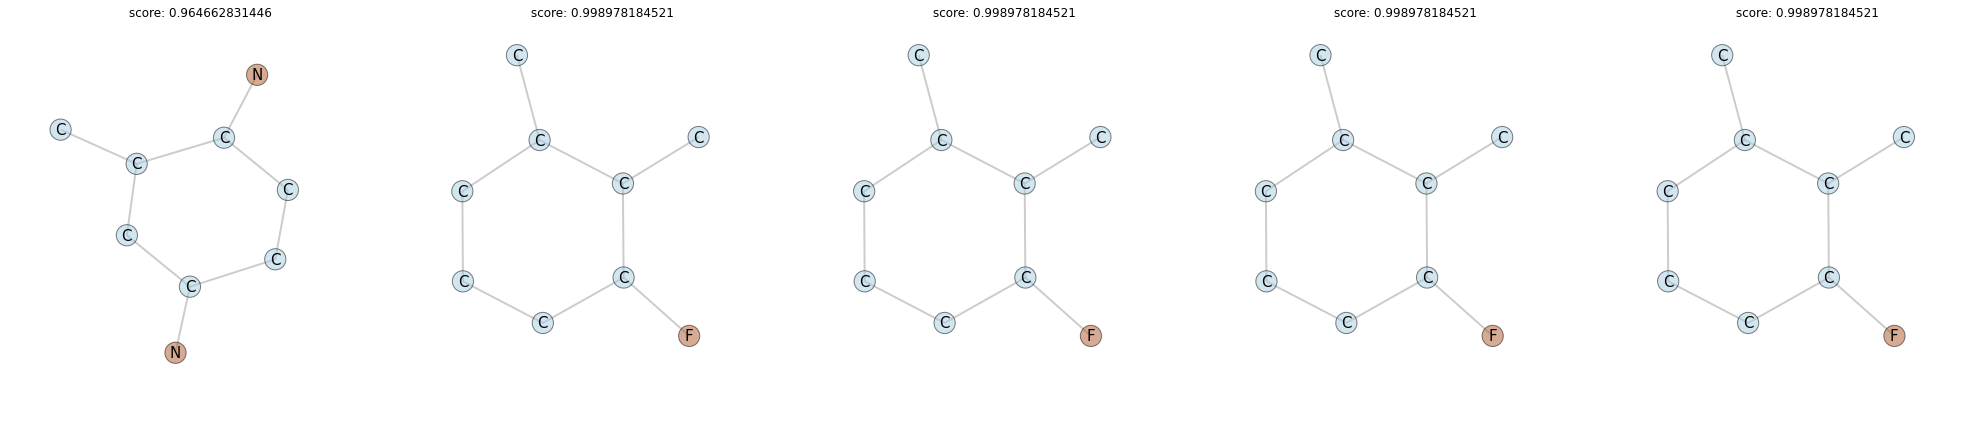

Graph id: 81


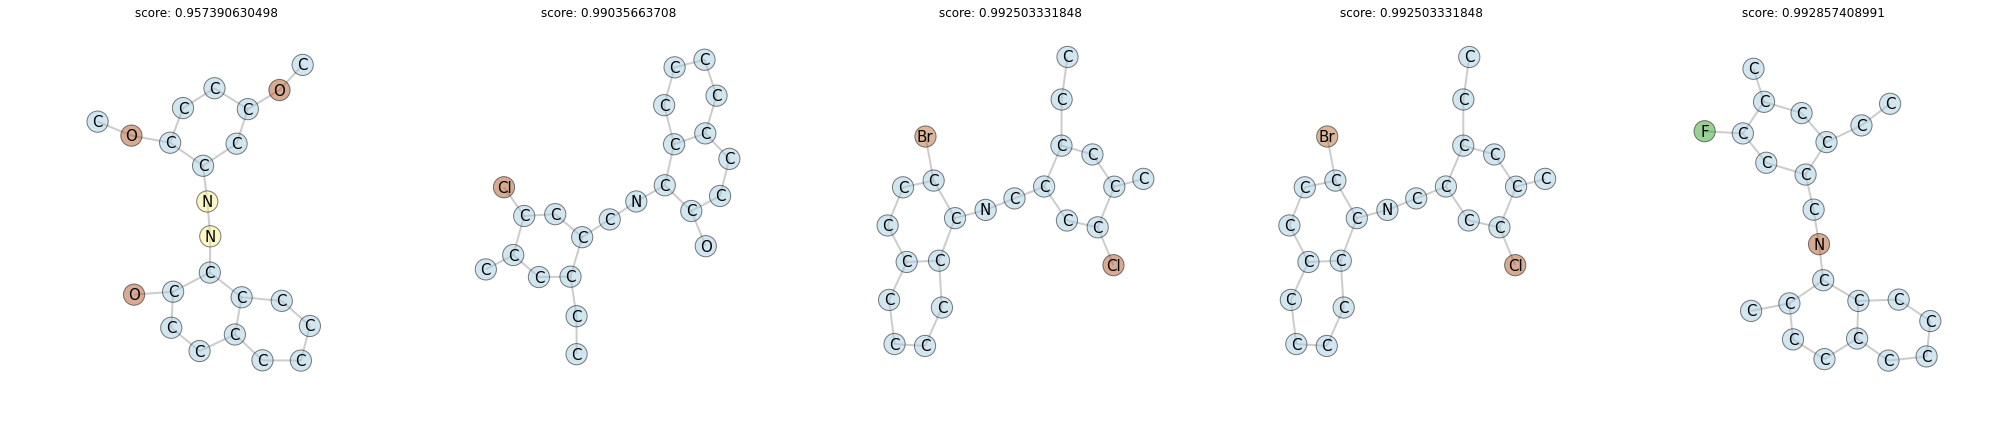

Graph id: 82


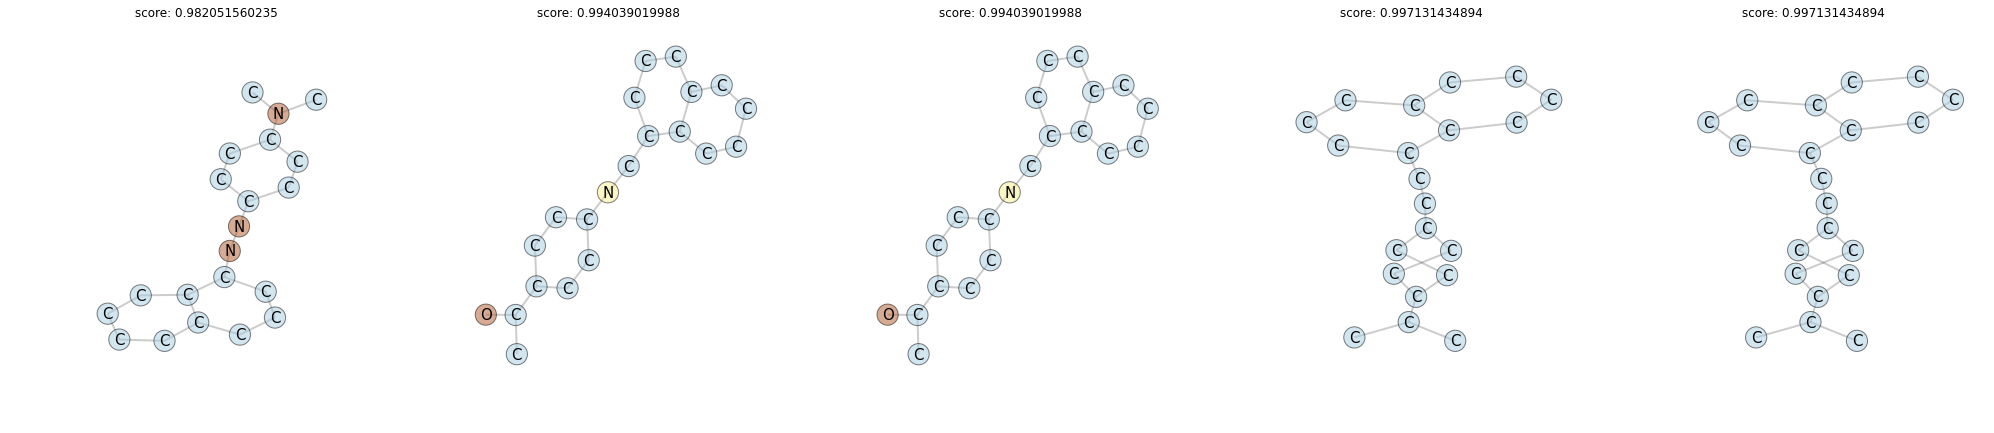

Graph id: 83


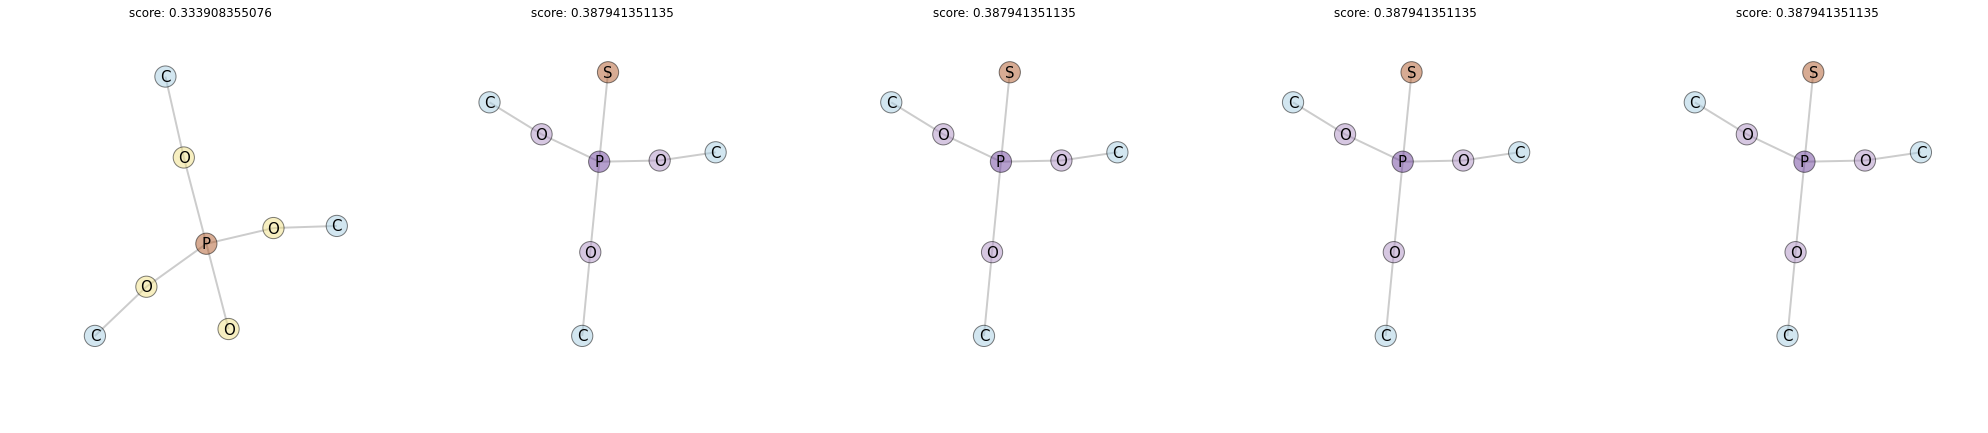

Graph id: 84


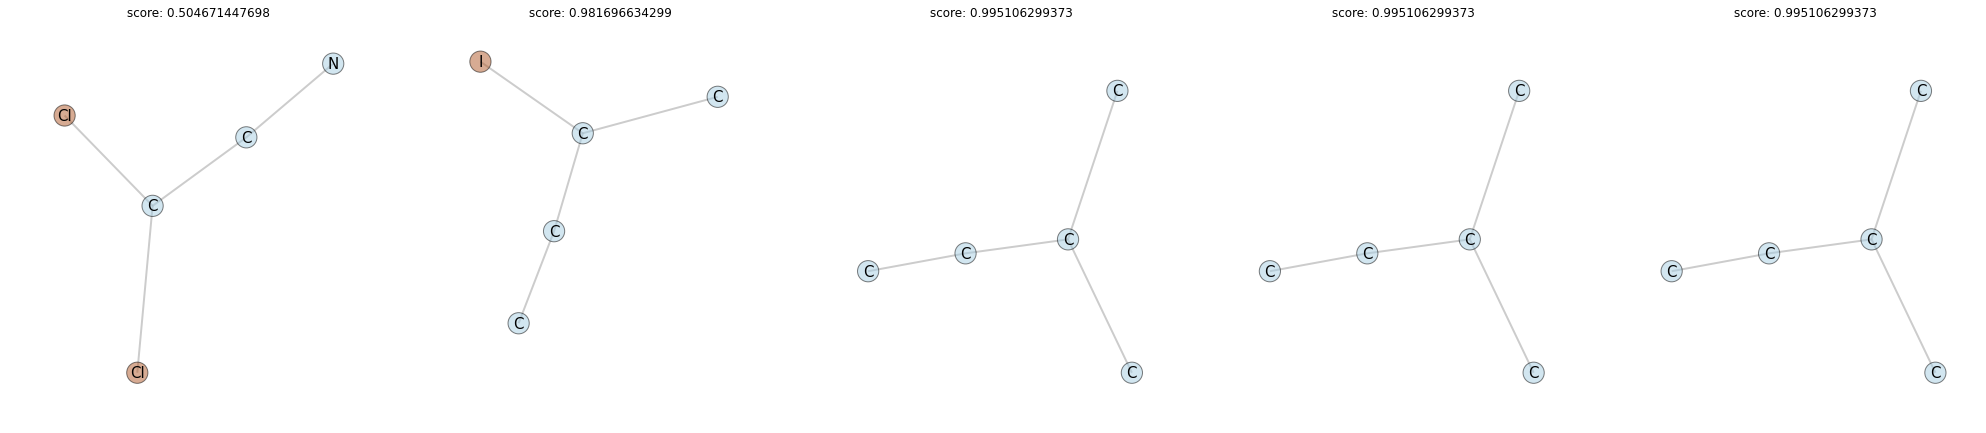

Graph id: 85


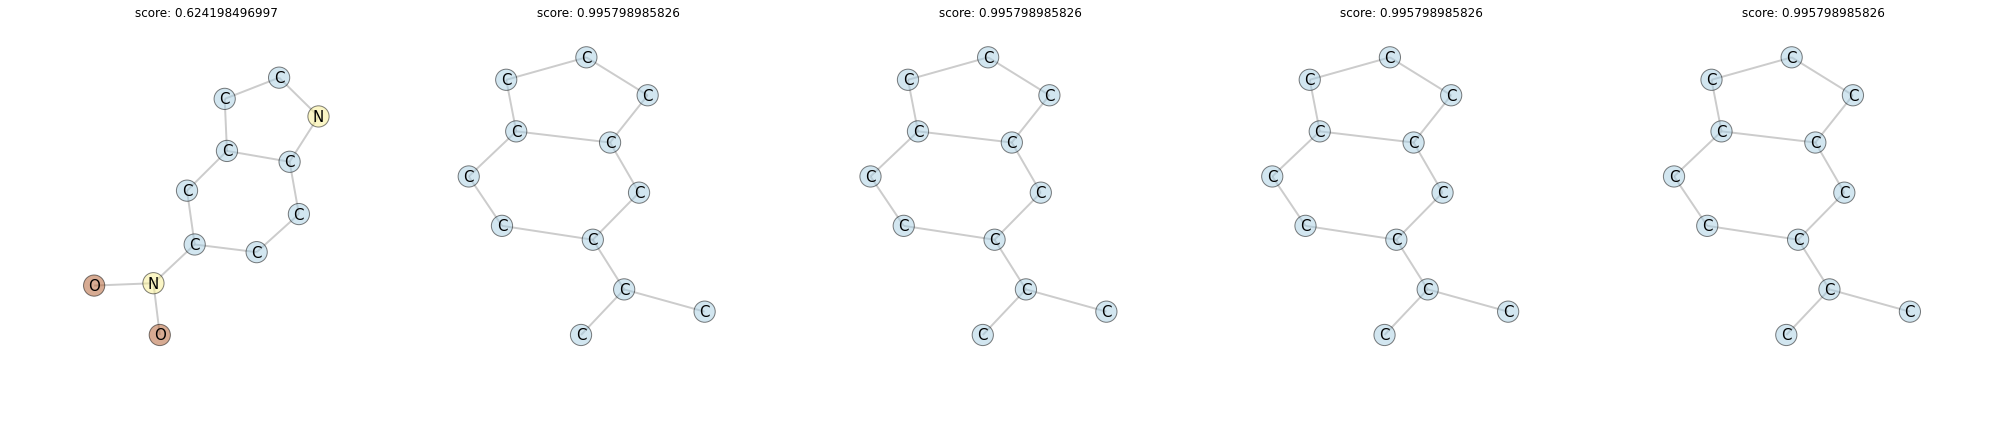

Graph id: 86


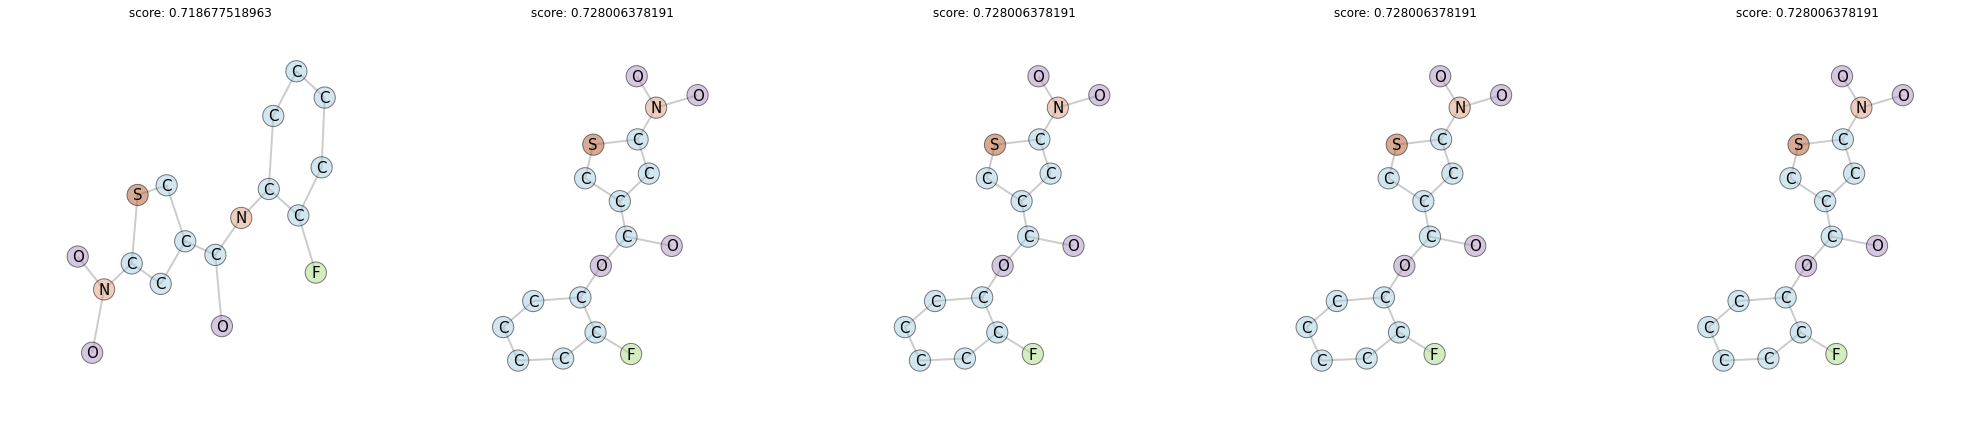

Graph id: 87


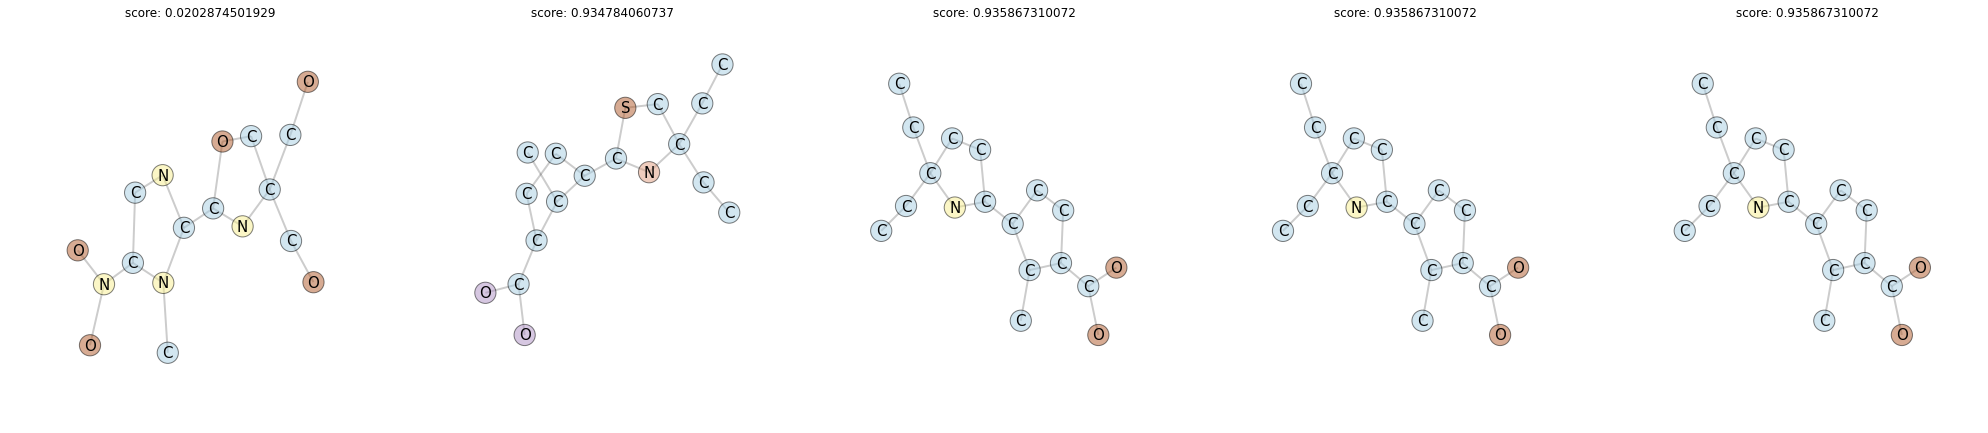

Graph id: 88


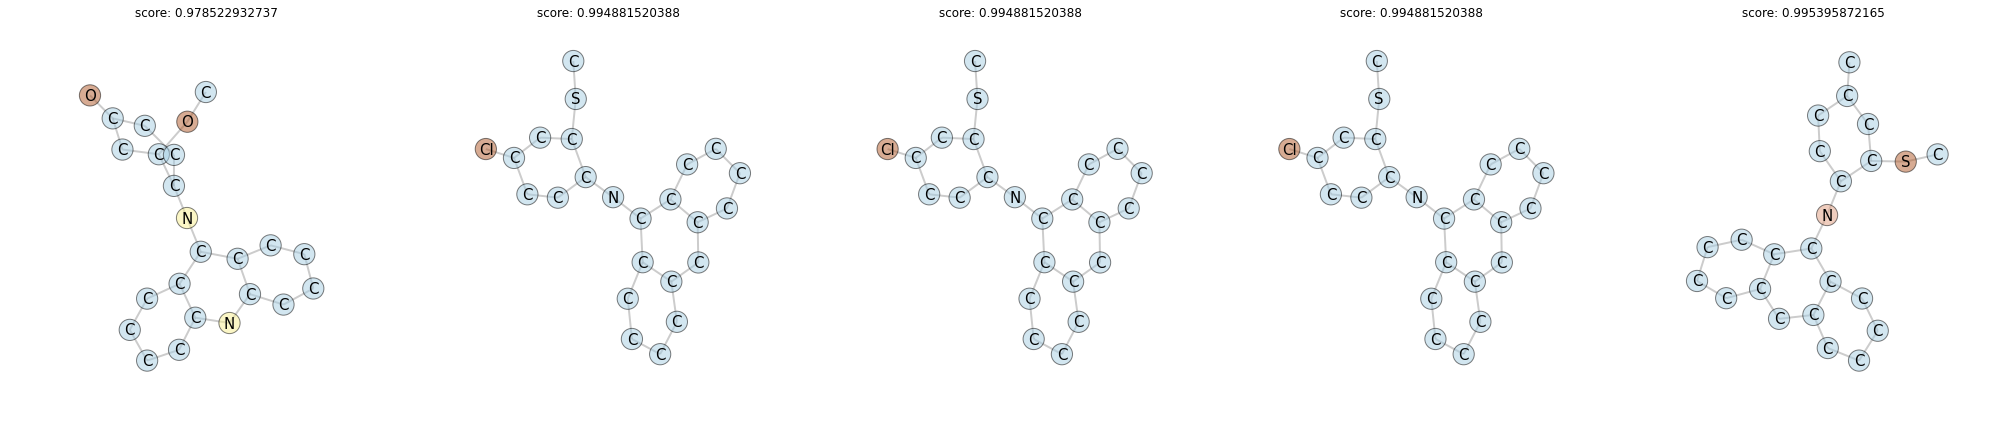

Graph id: 89


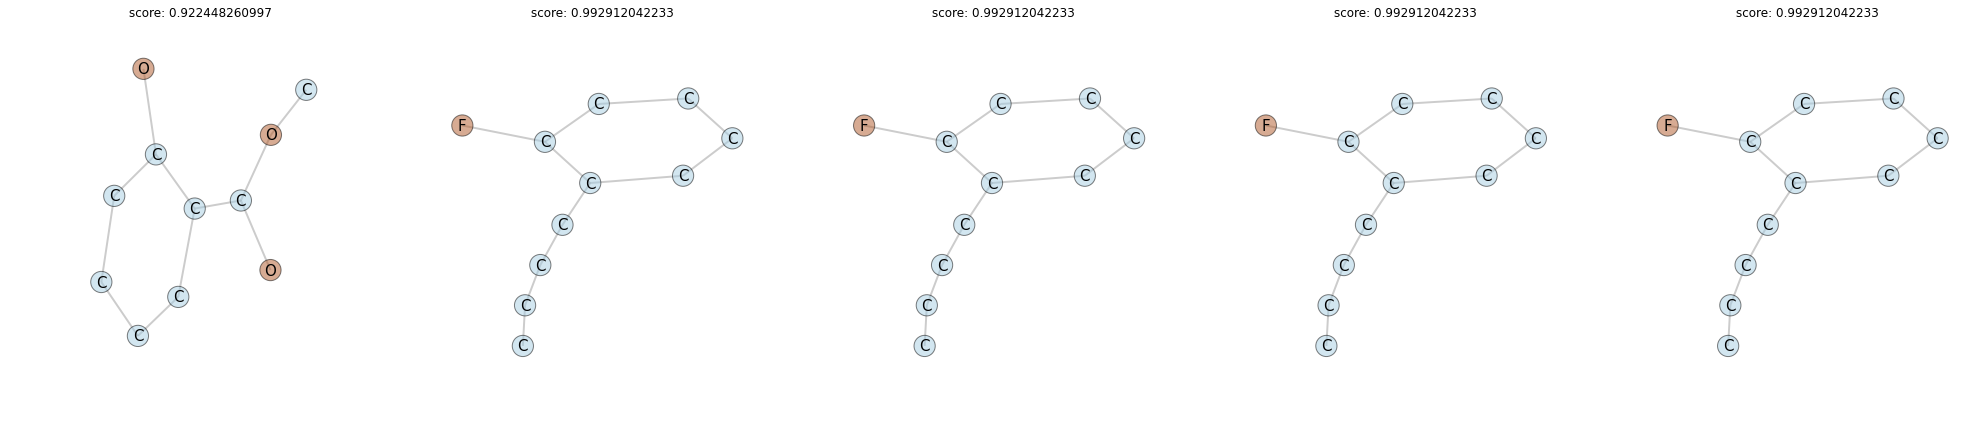

Graph id: 90


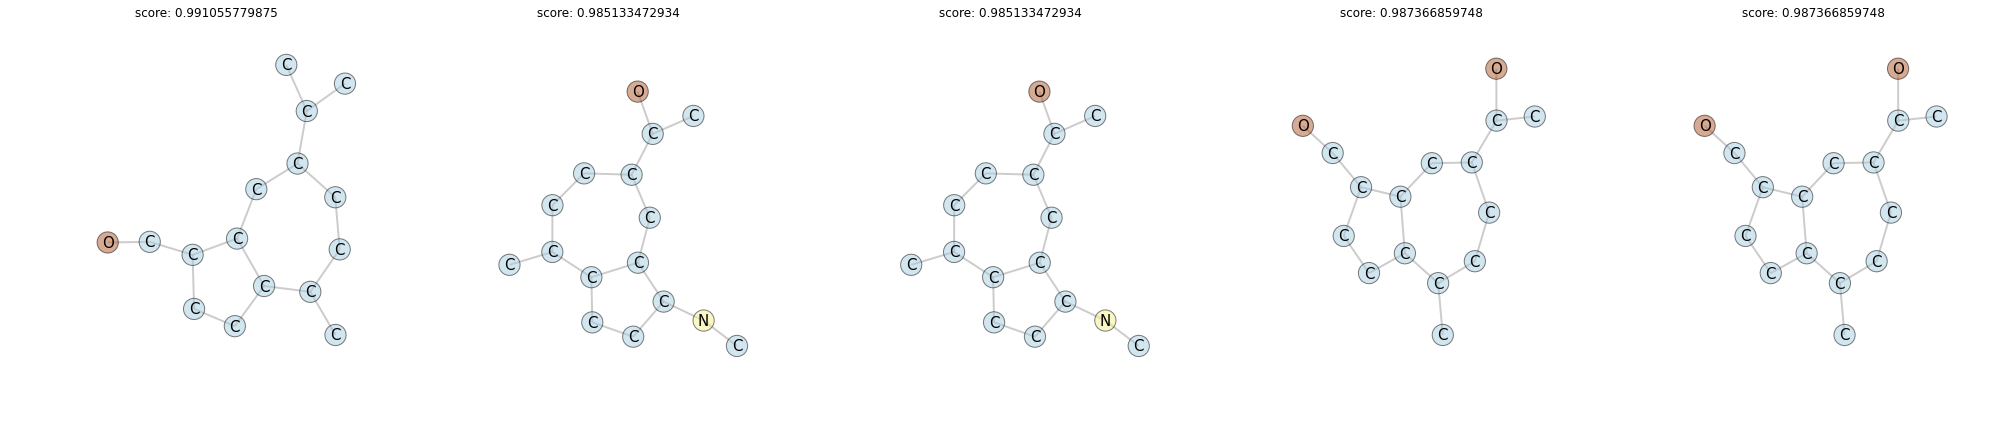

Graph id: 91


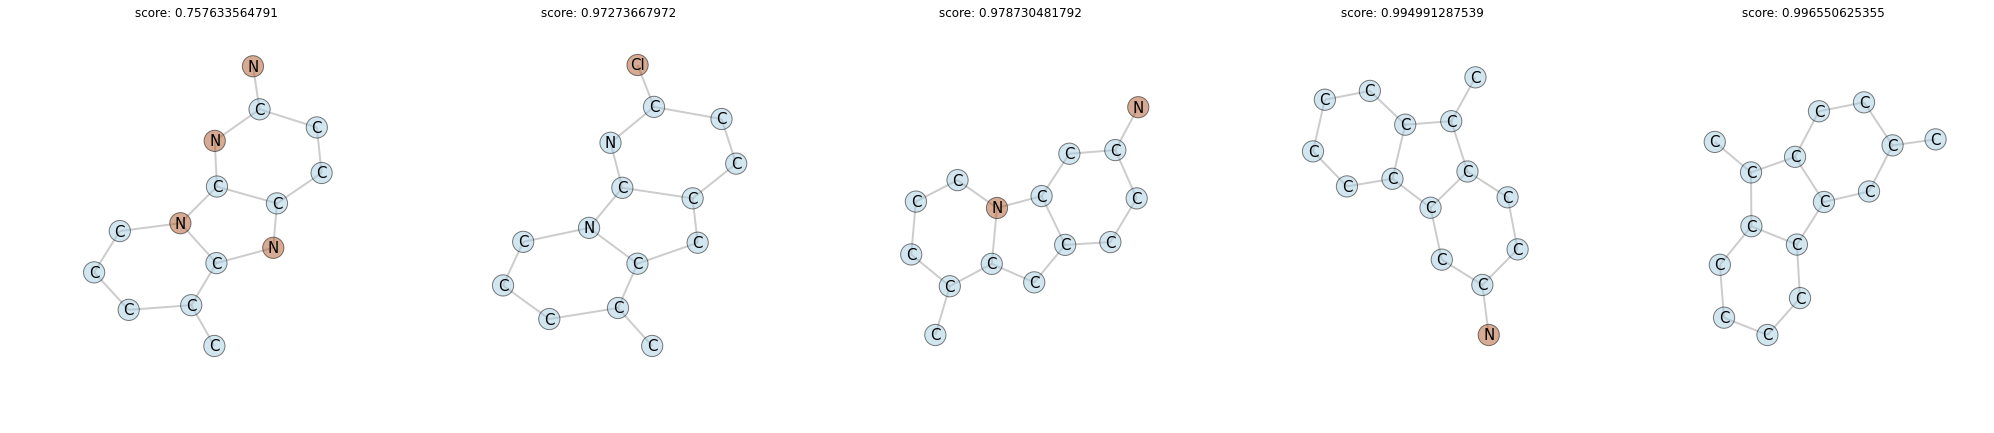

Graph id: 92


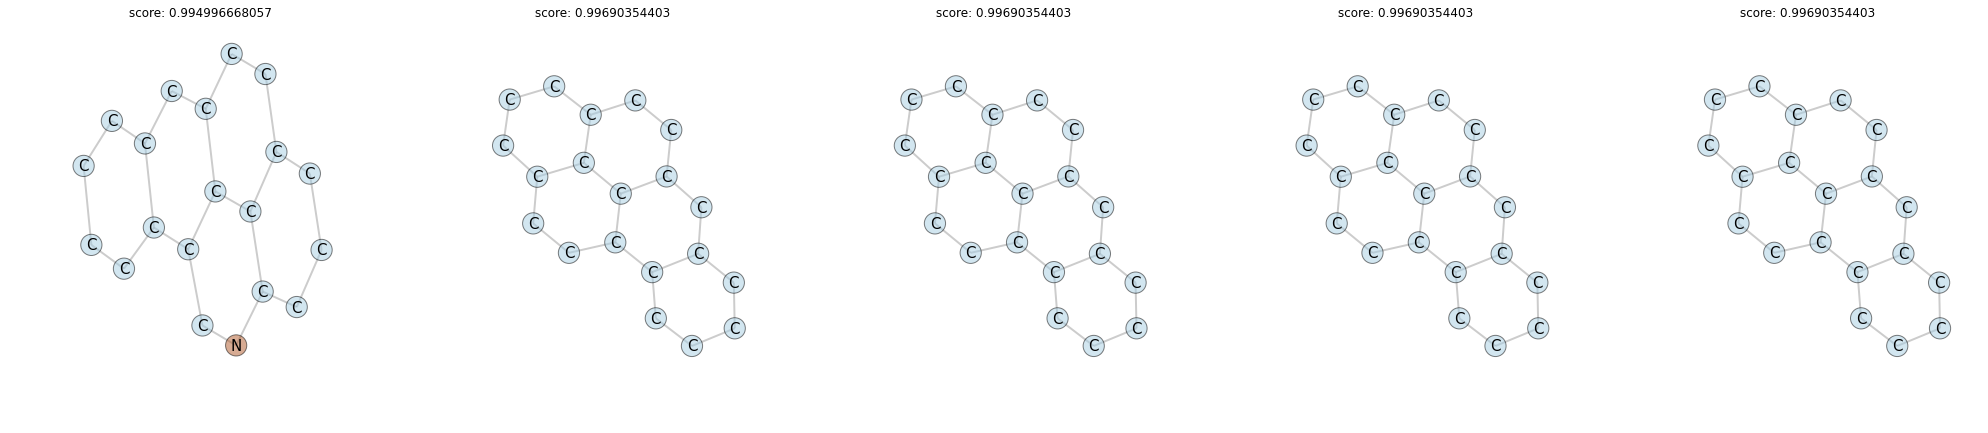

Graph id: 93


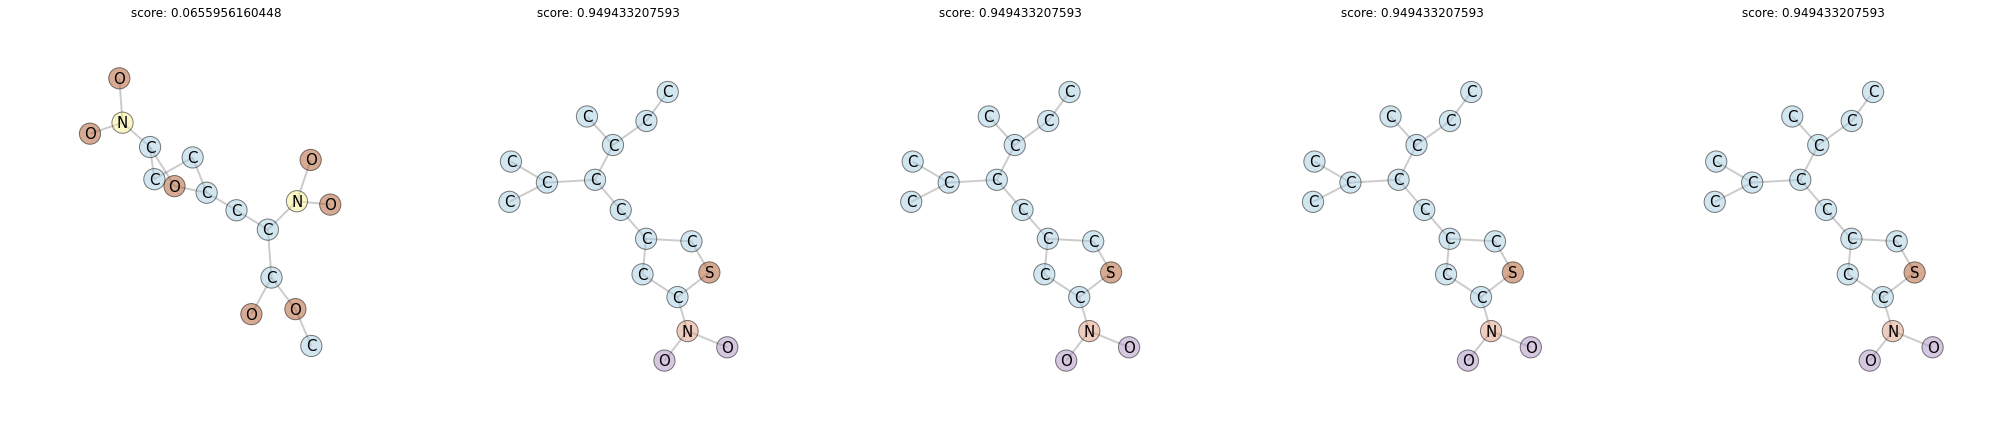

Graph id: 94


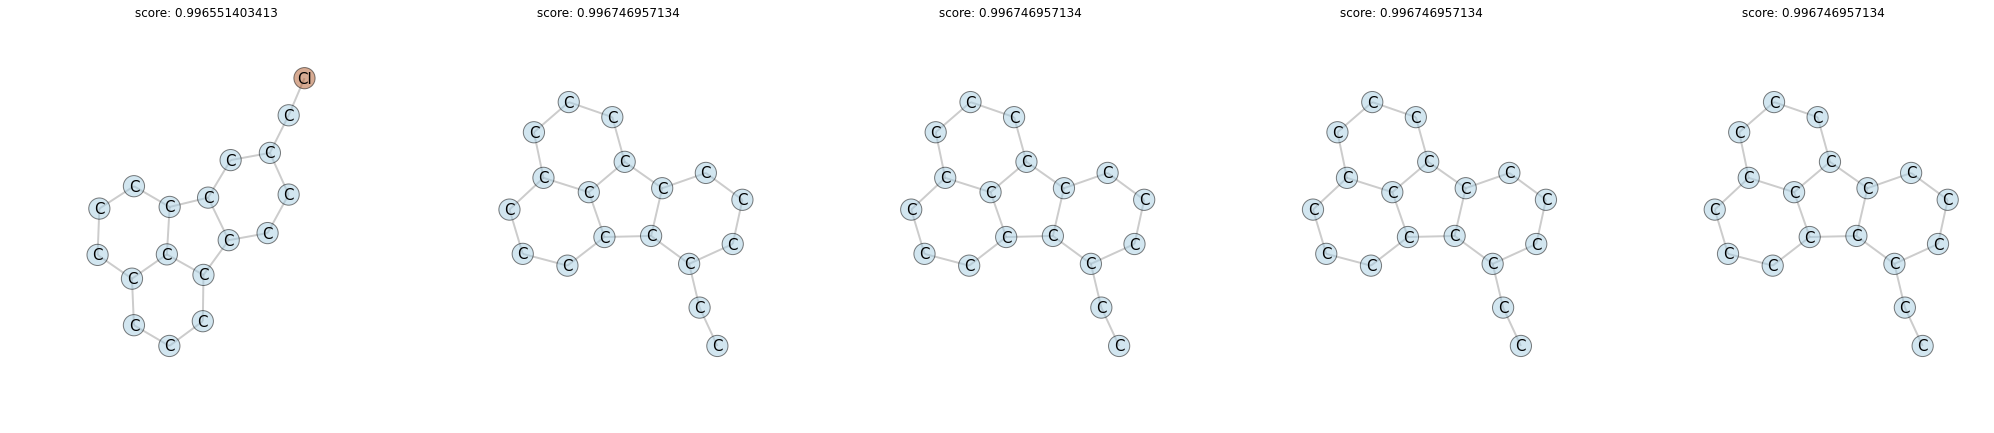

Graph id: 95


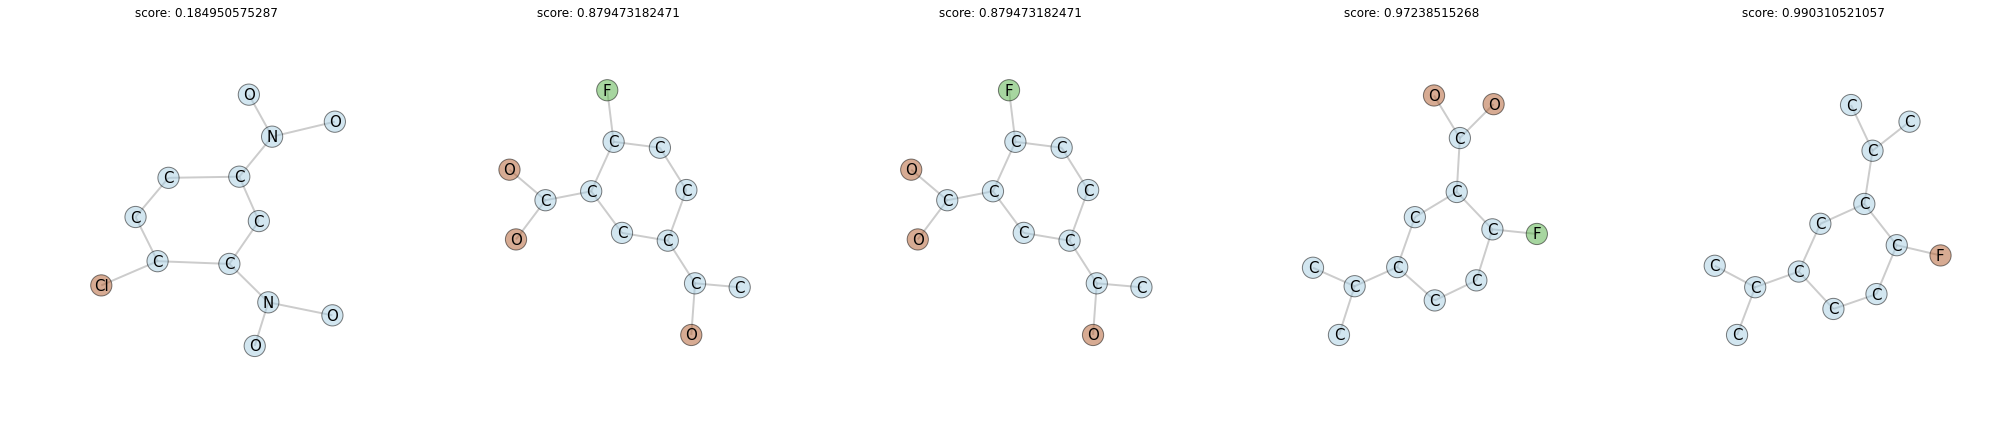

Graph id: 96


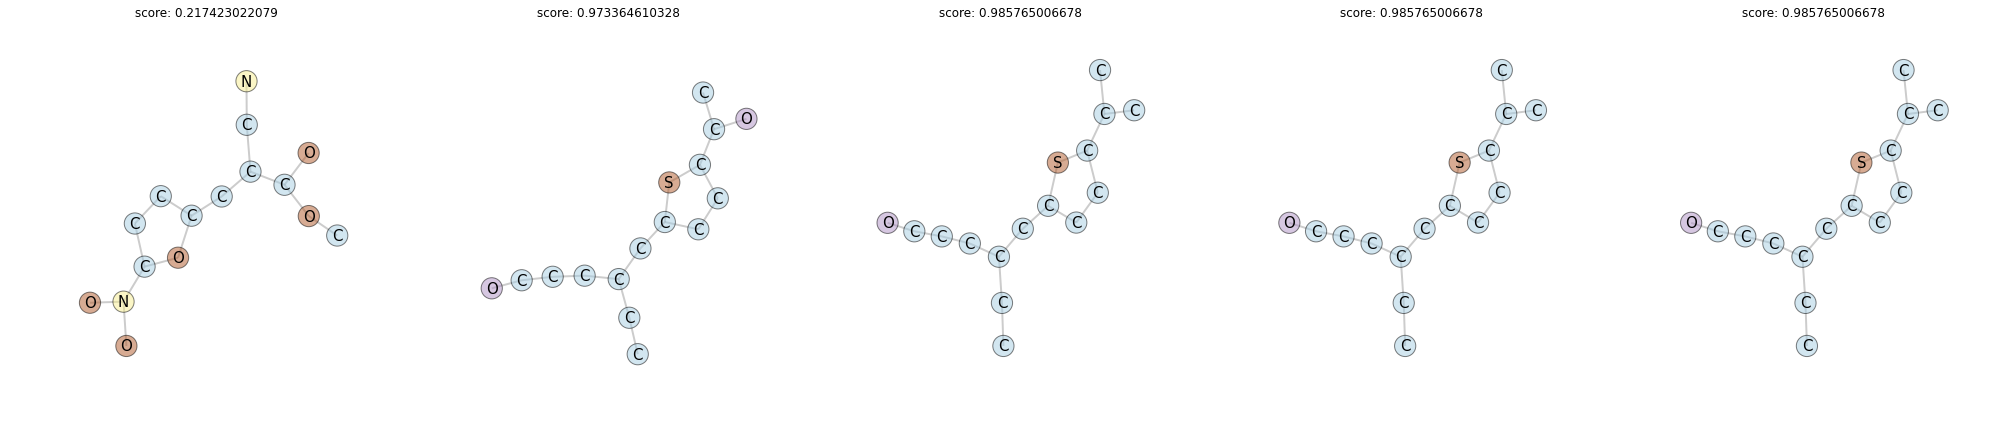

Graph id: 97


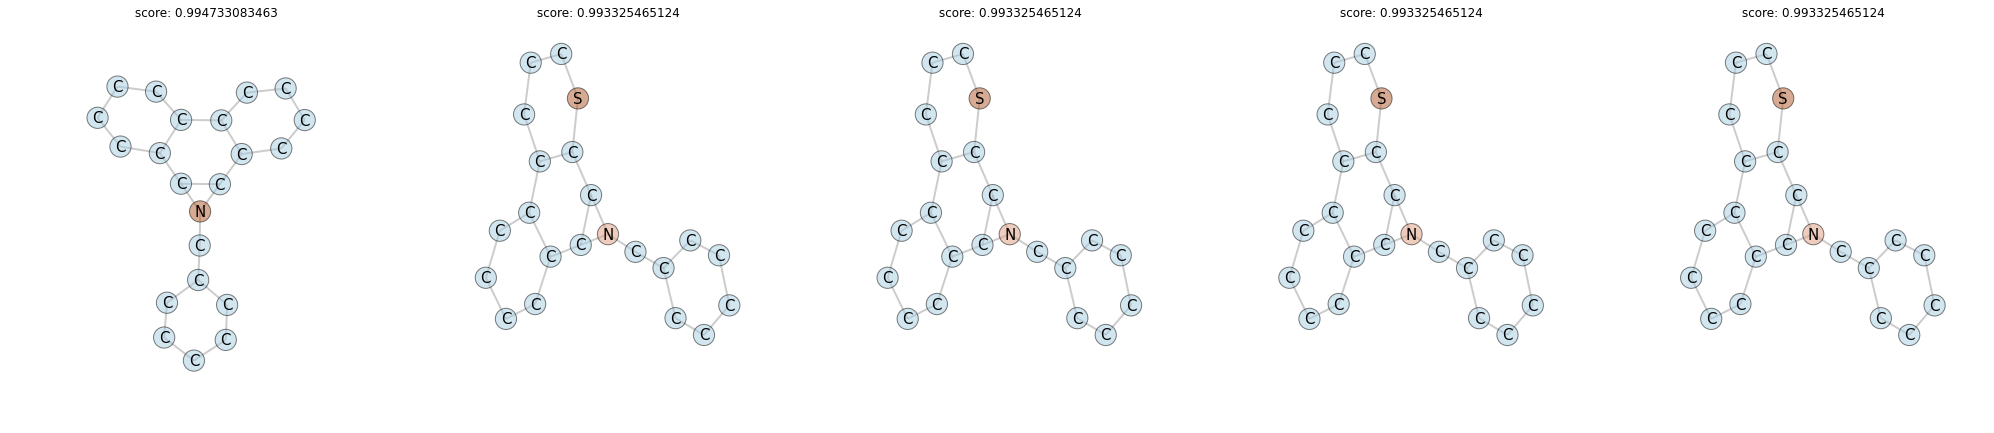

Graph id: 98


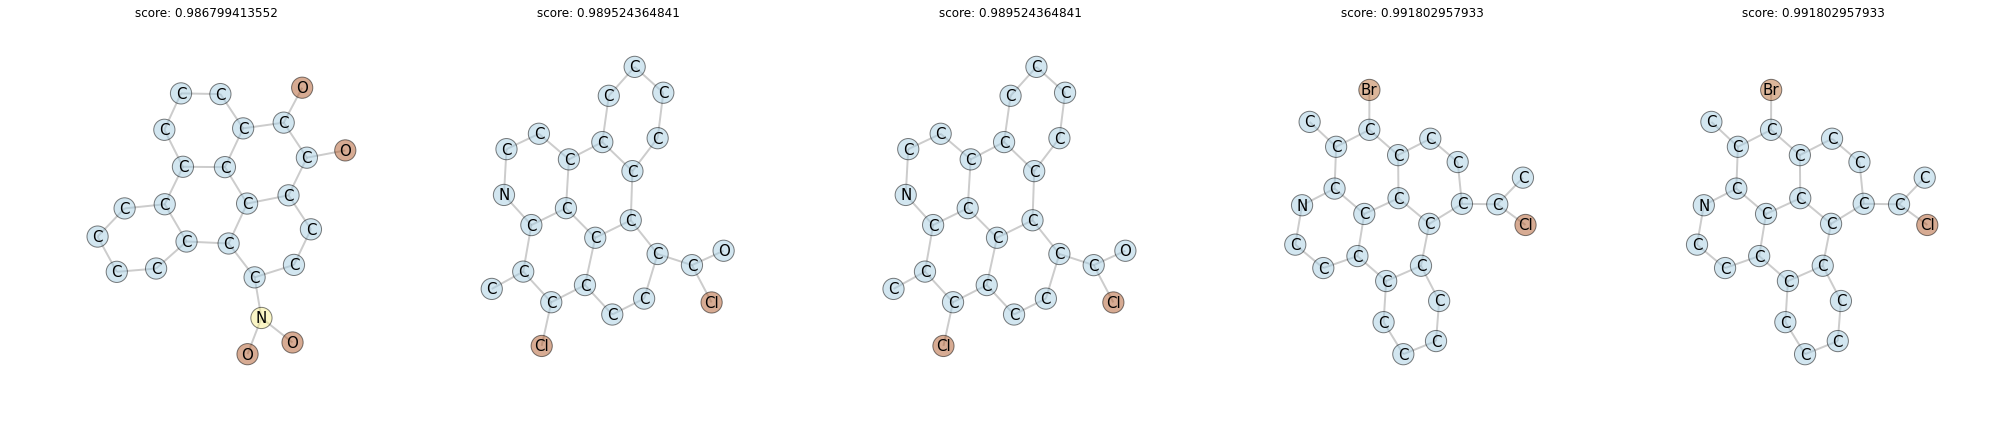

Graph id: 99


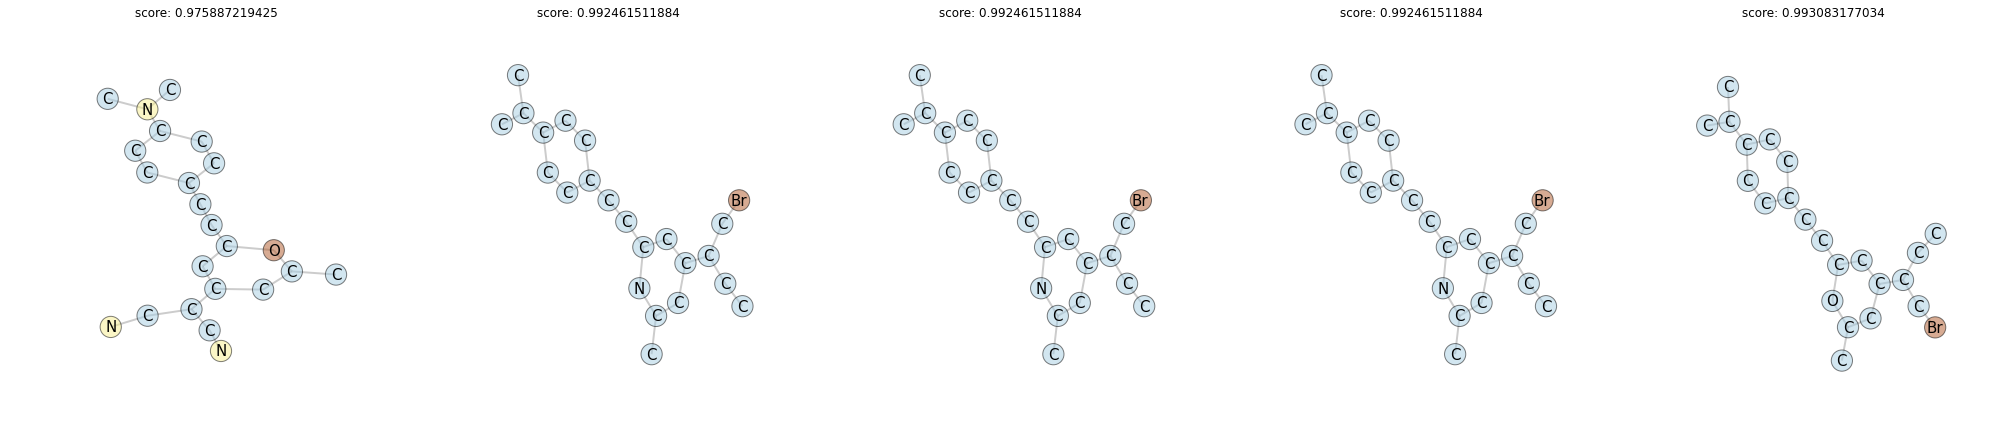

Graph id: 100


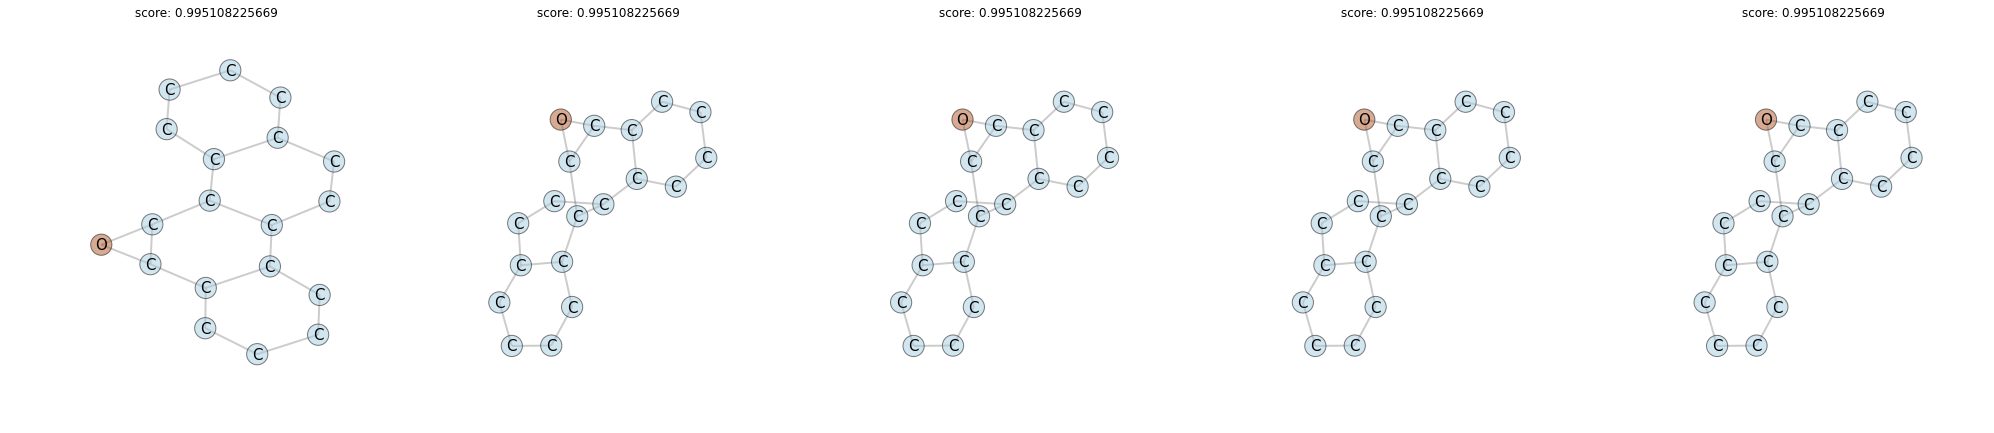

Graph id: 101


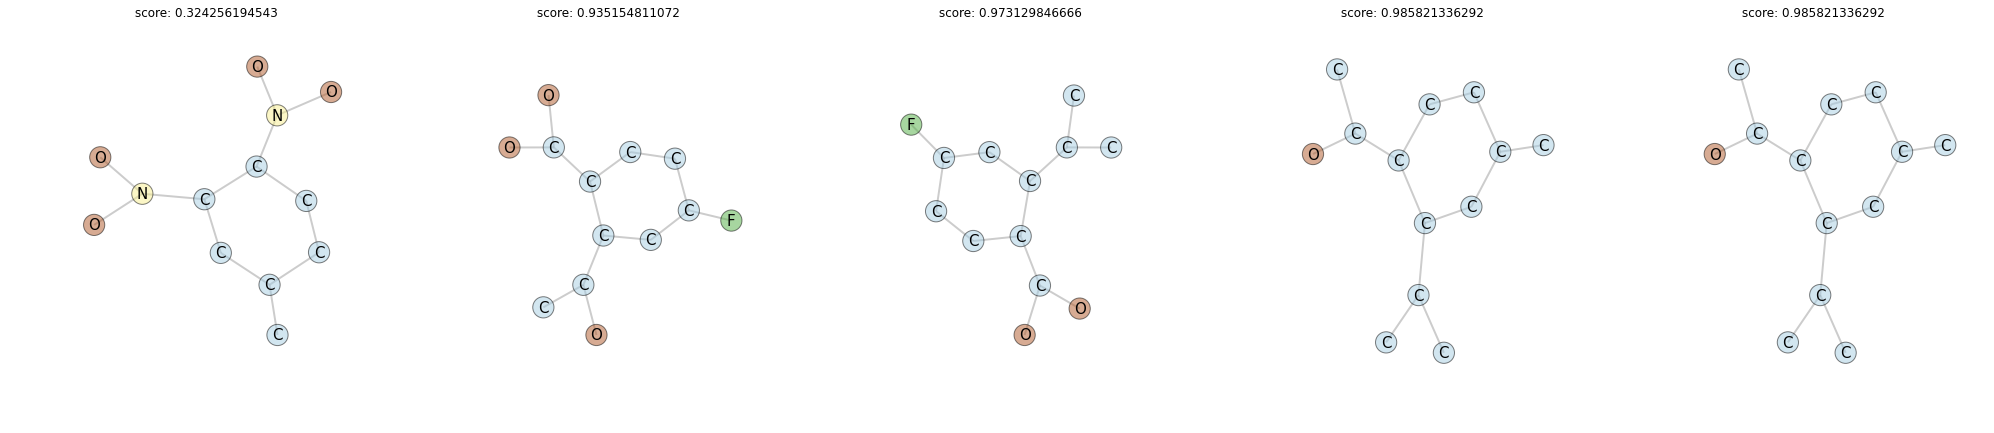

Graph id: 102


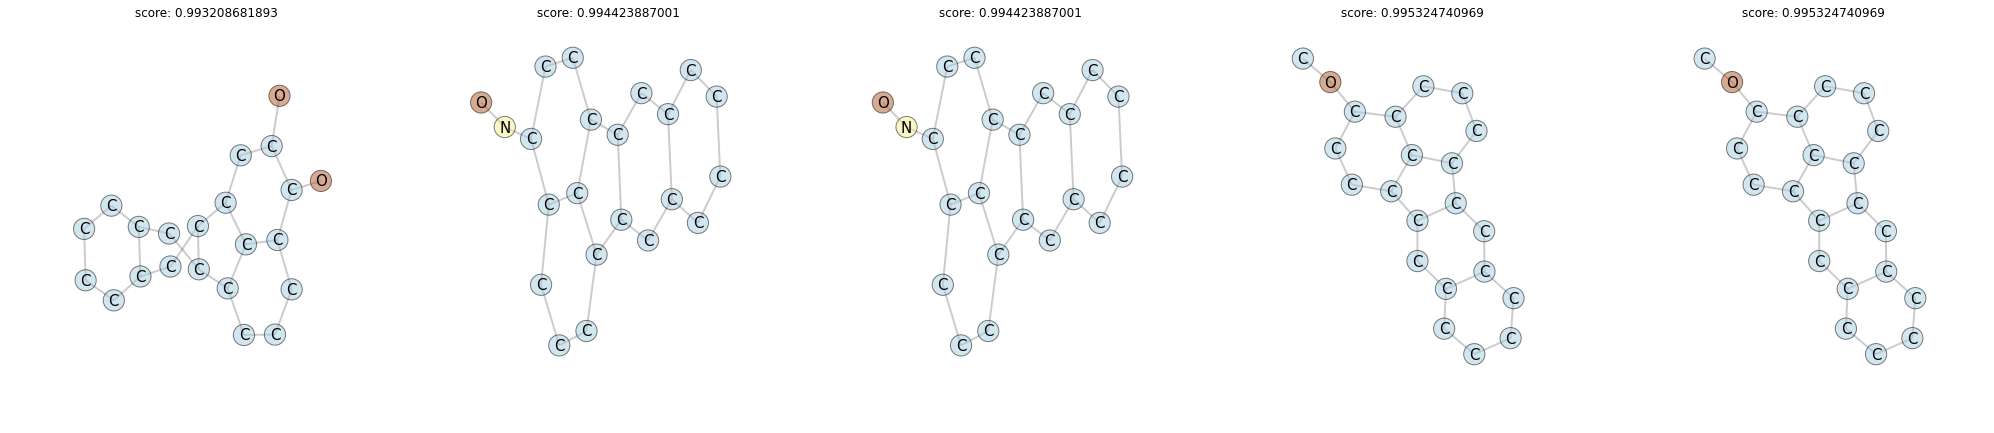

Graph id: 103


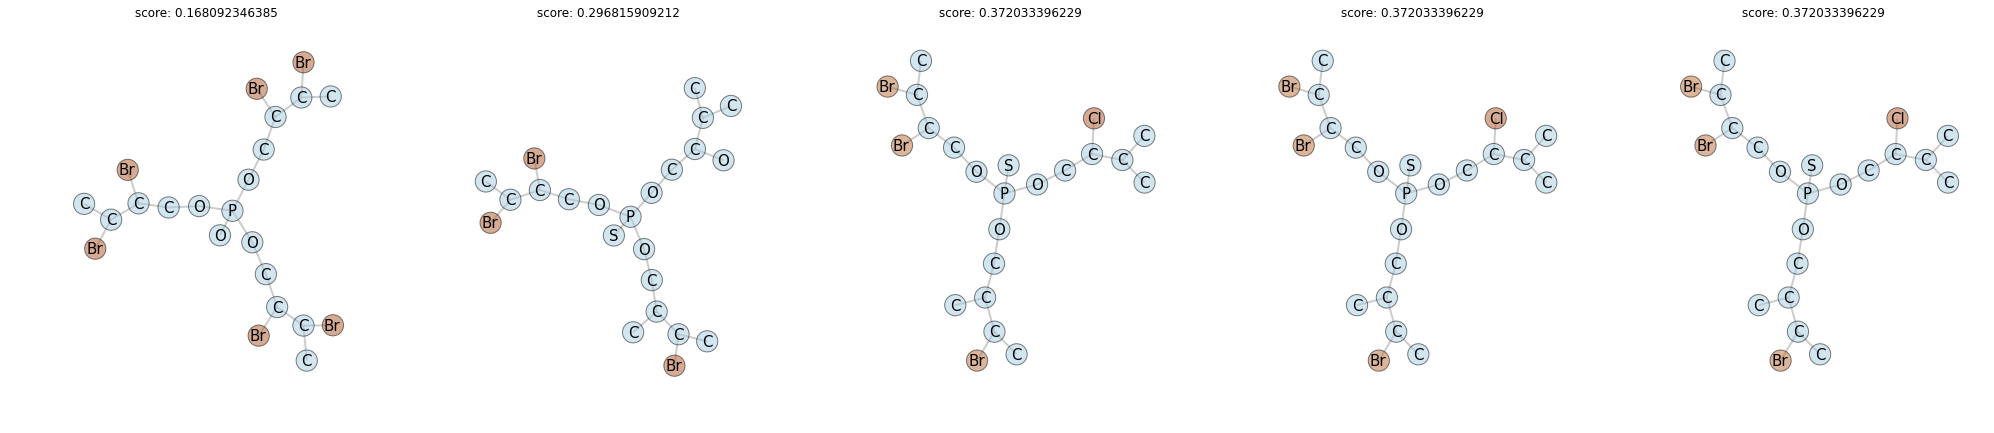

Graph id: 104


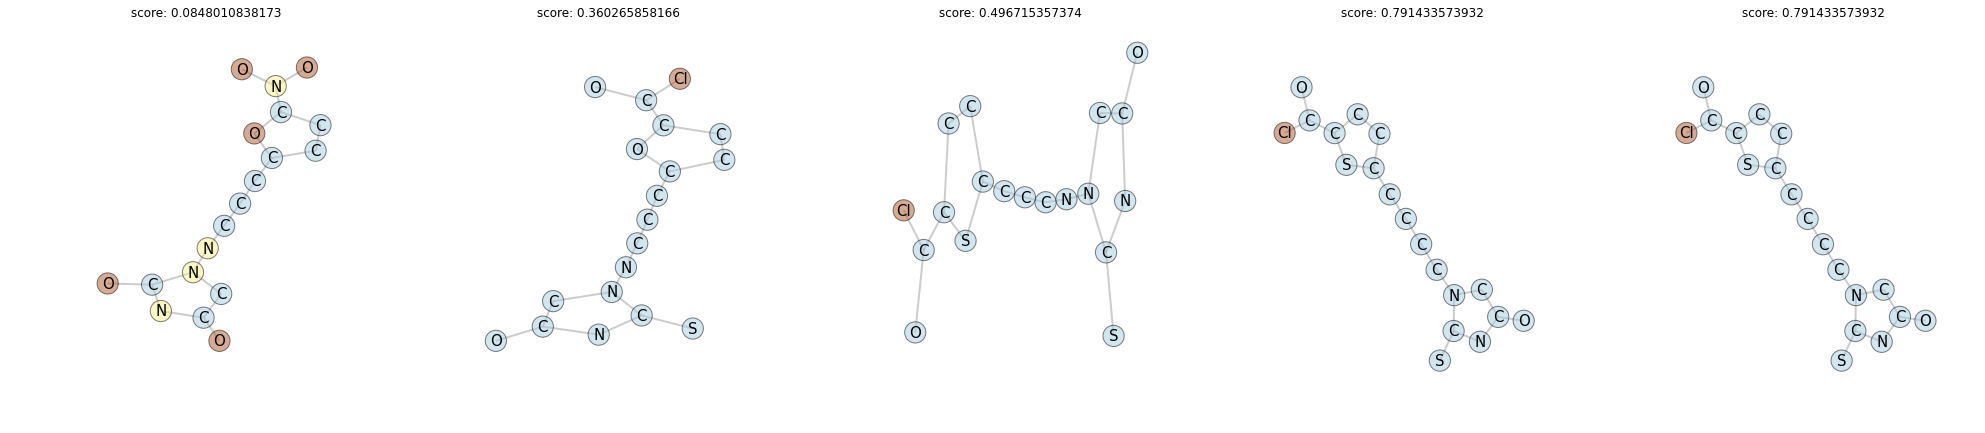

Graph id: 105


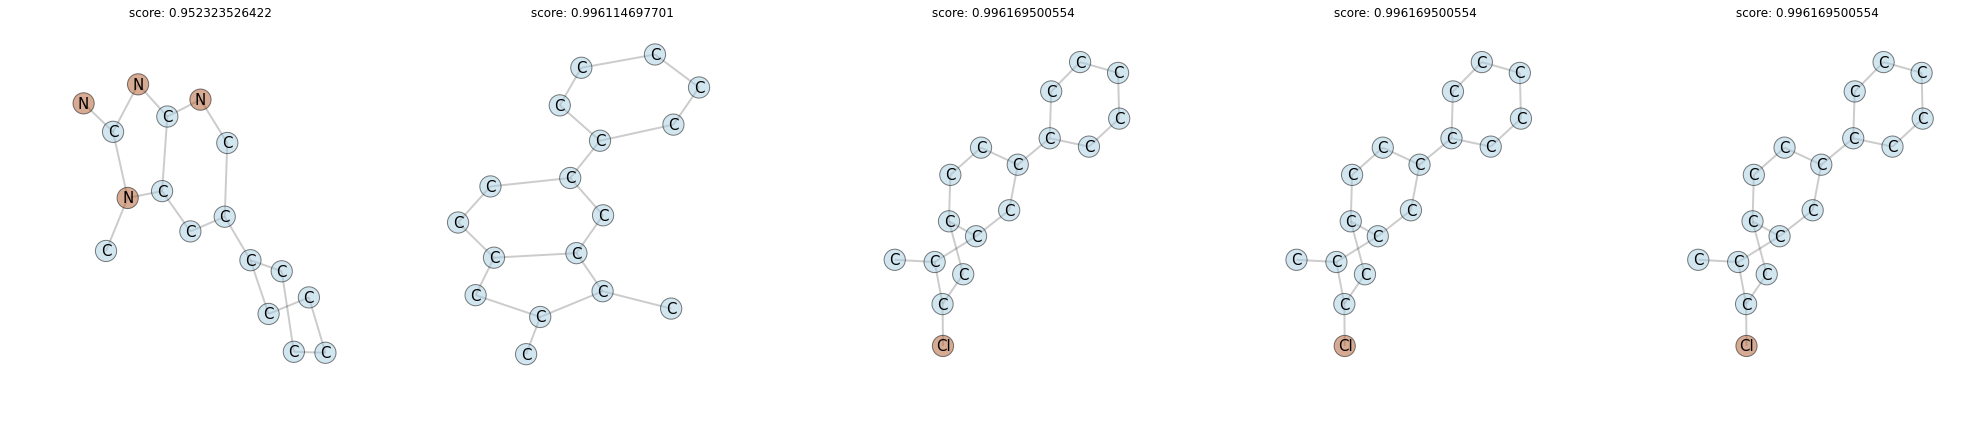

Graph id: 106


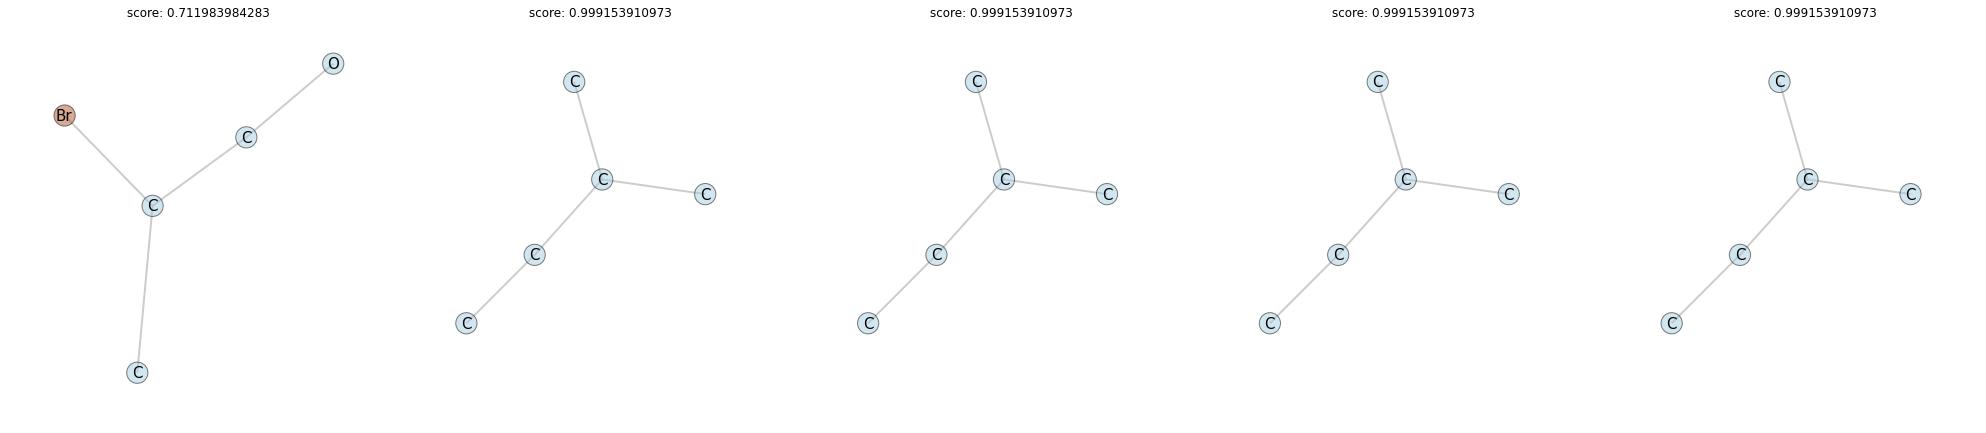

Graph id: 107


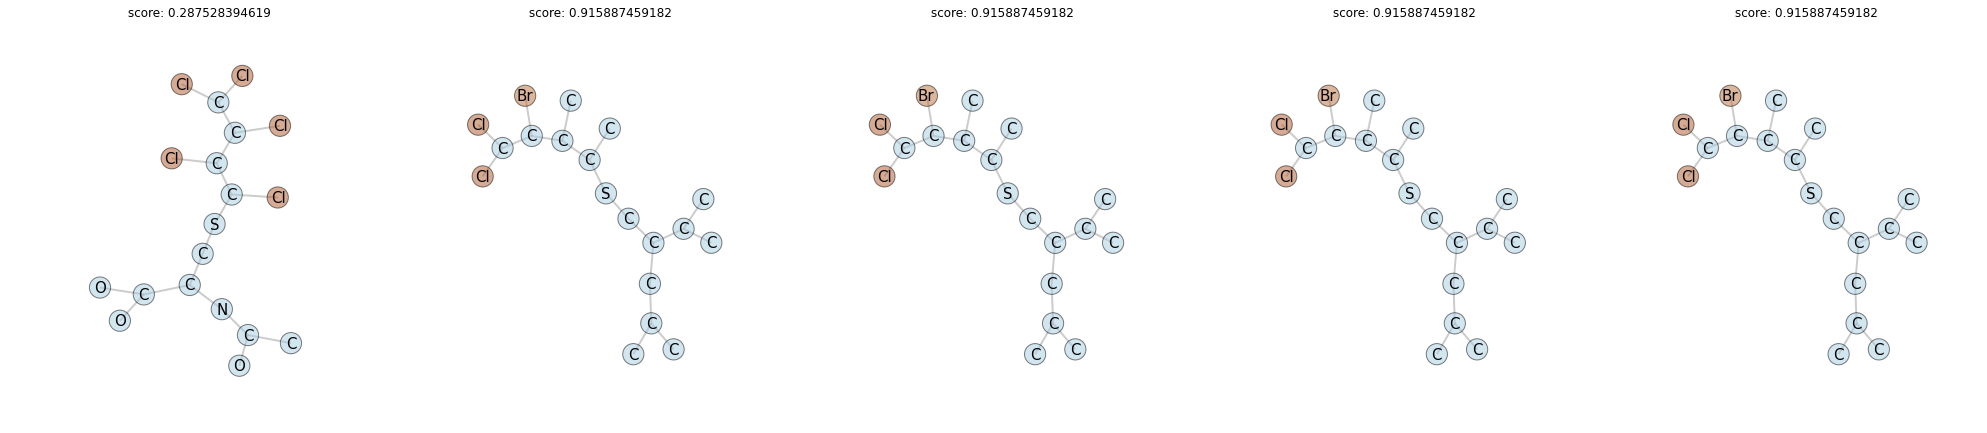

Graph id: 108


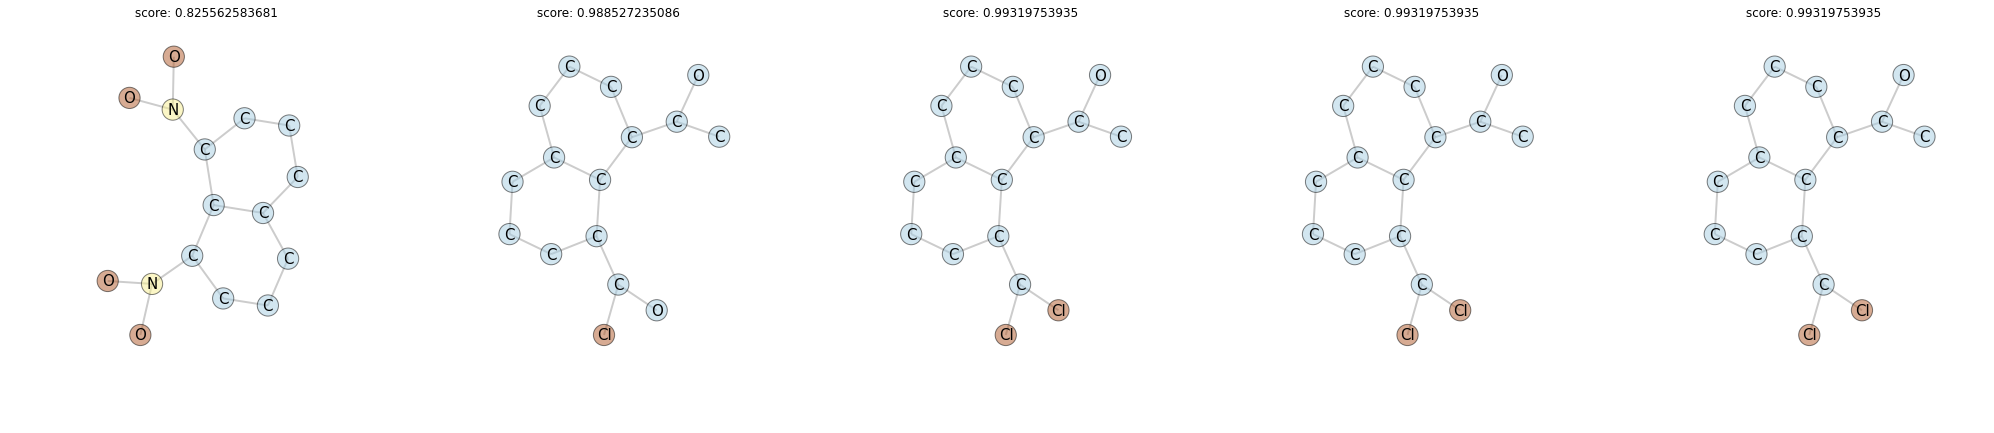

Graph id: 109


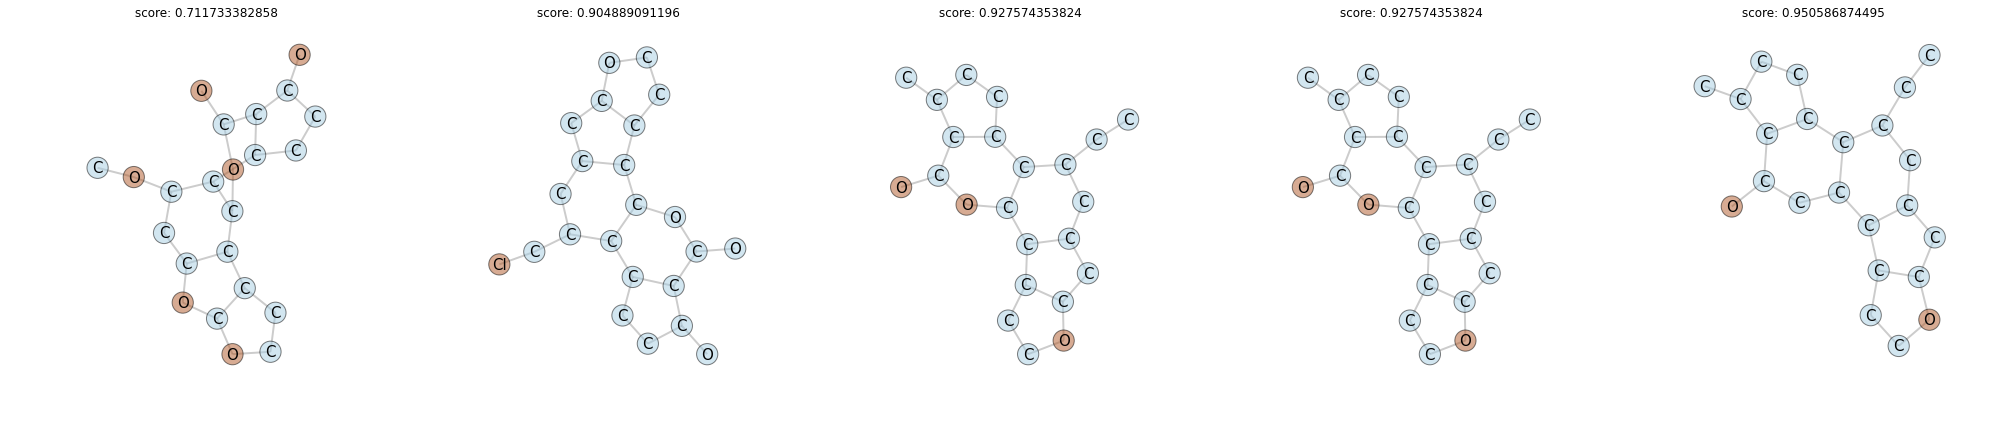

Graph id: 110


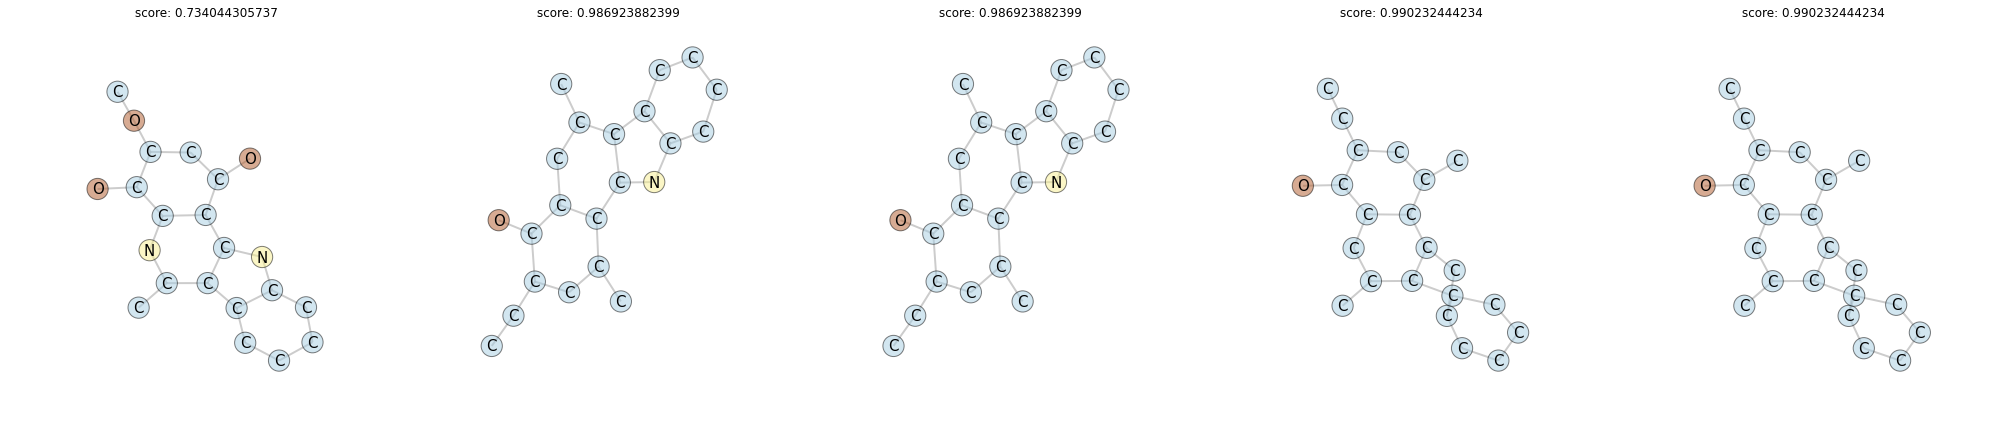

Graph id: 111


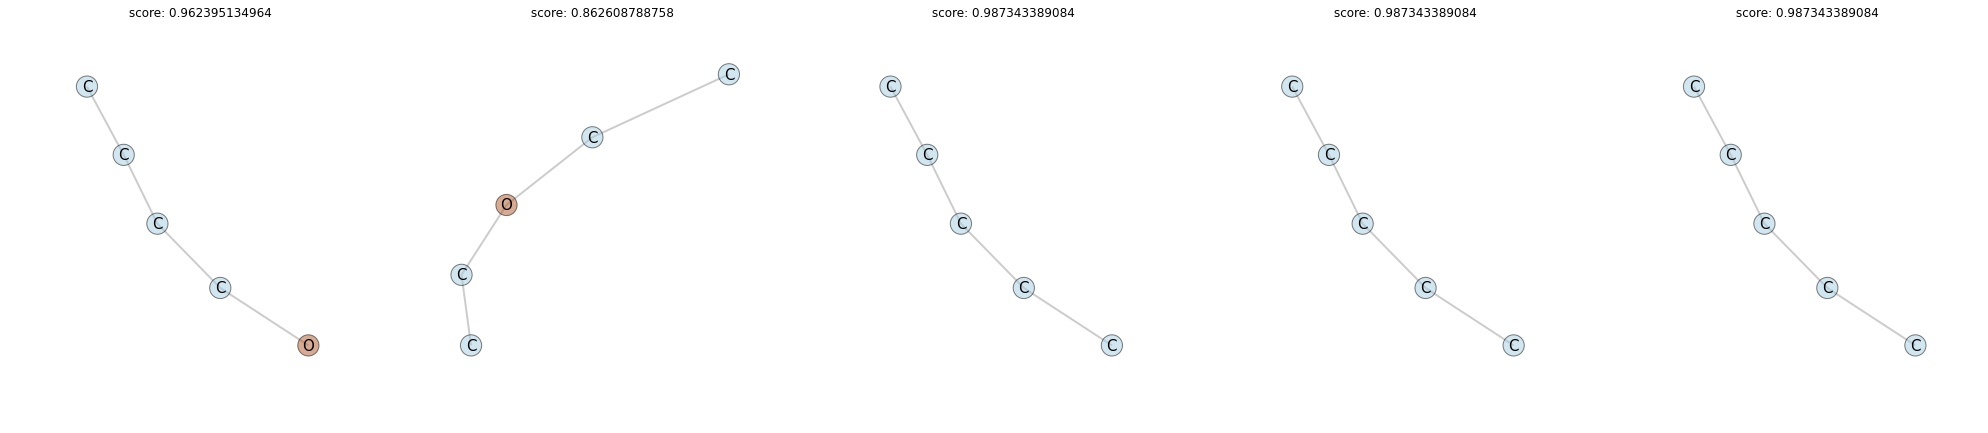

Graph id: 112


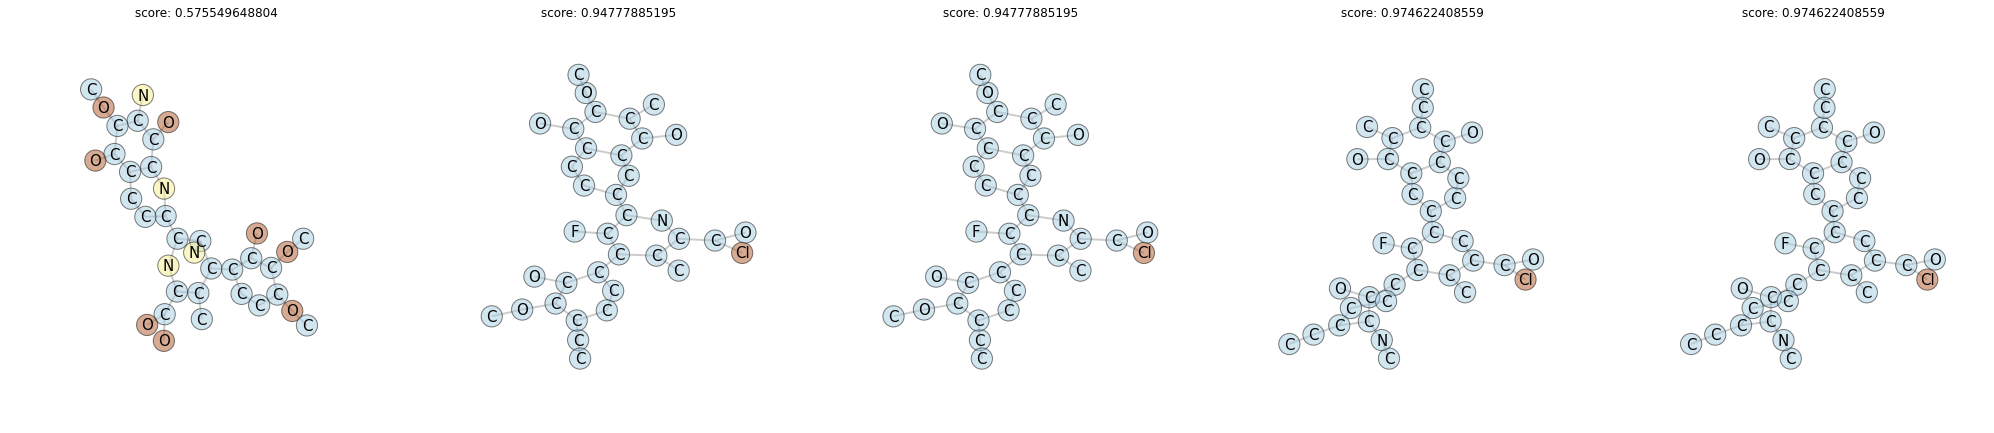

Graph id: 113


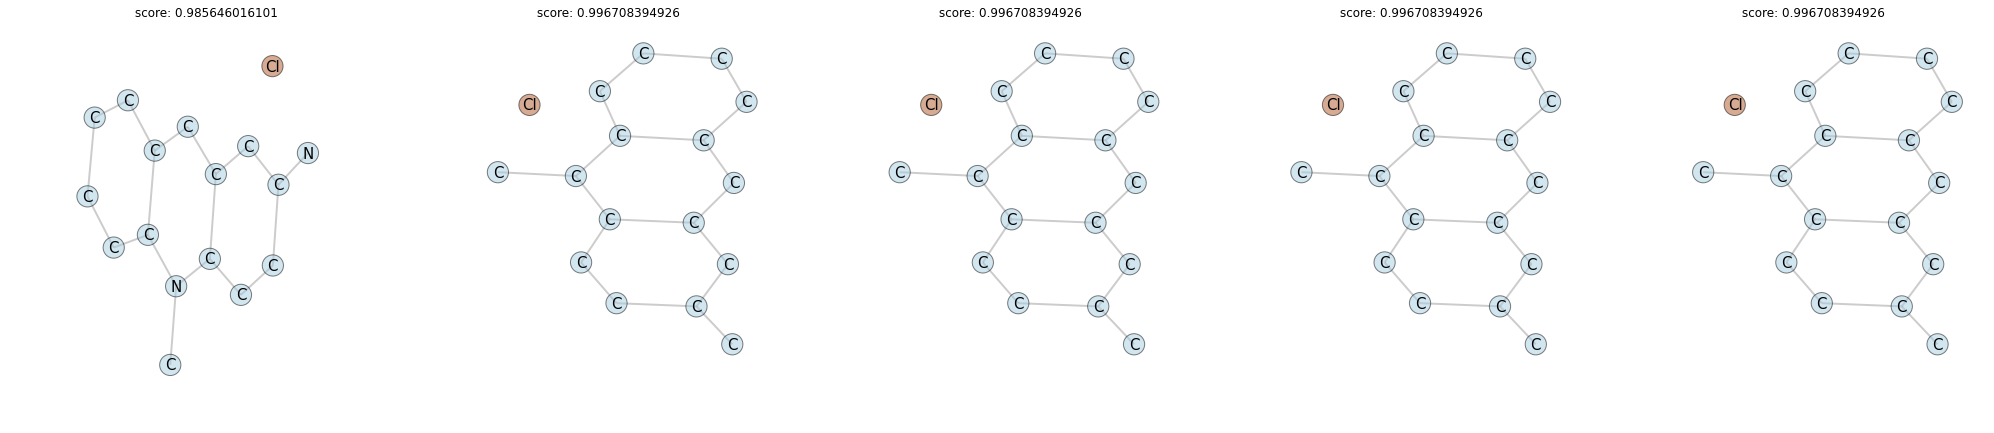

Graph id: 114


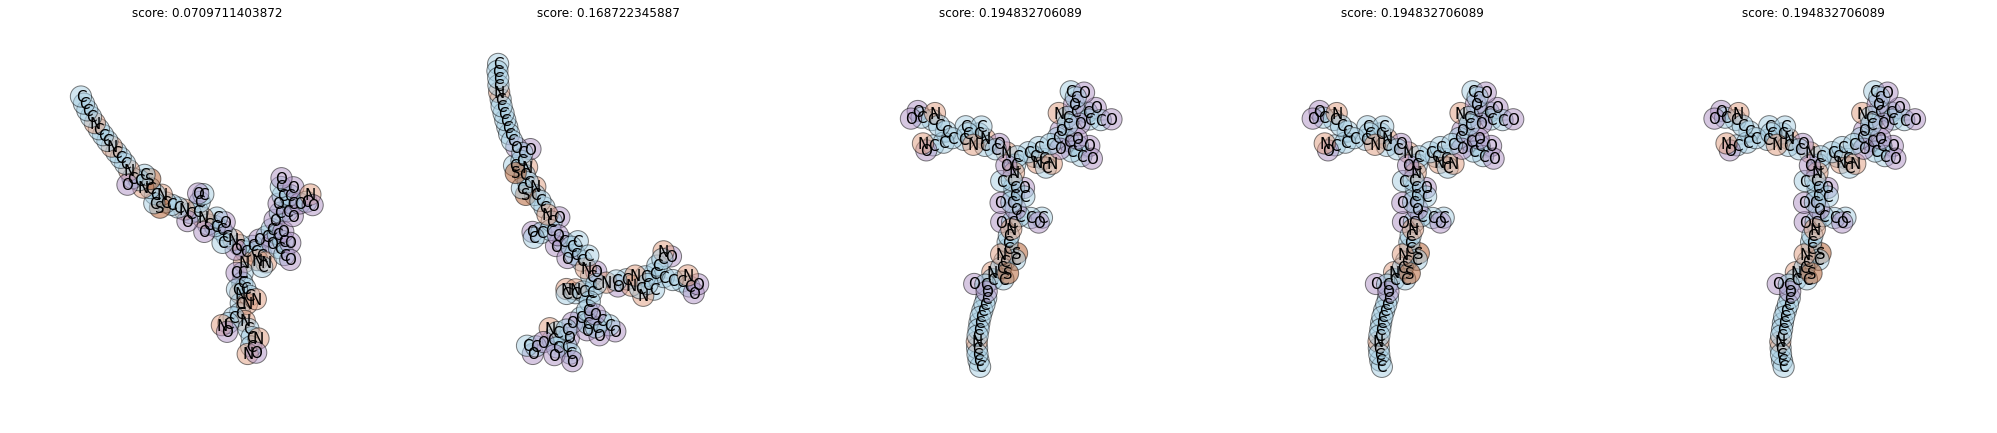

Graph id: 115


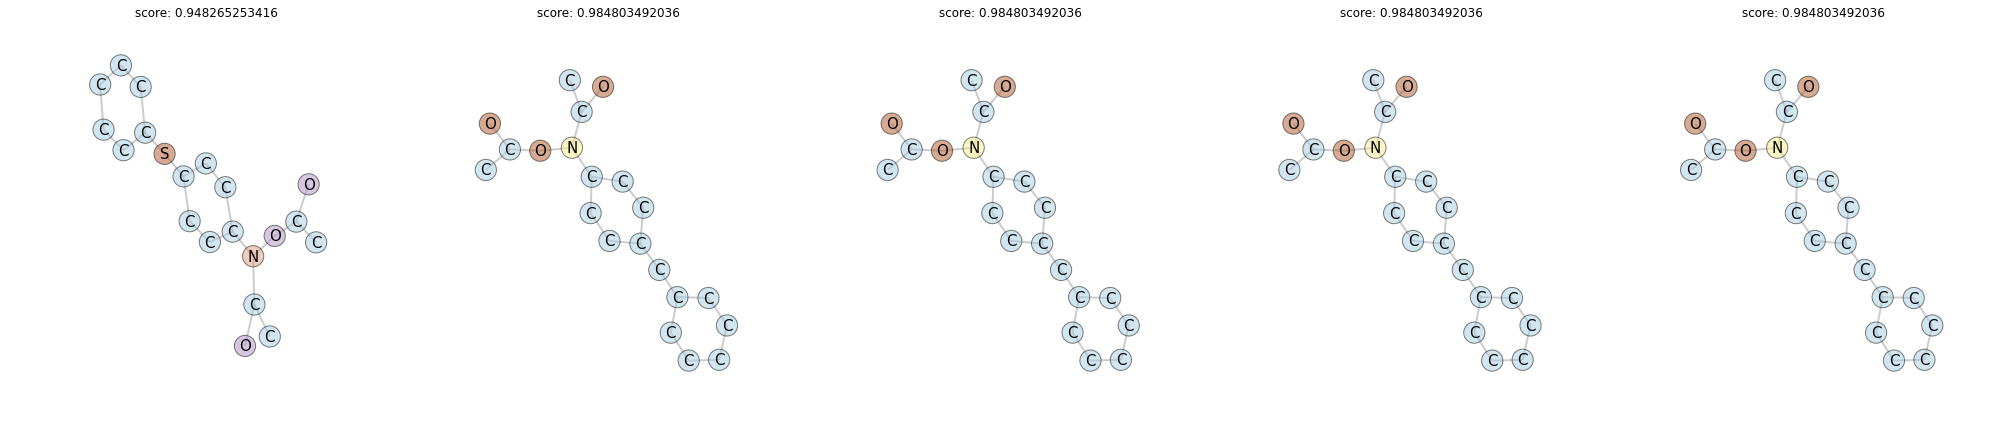

Graph id: 116


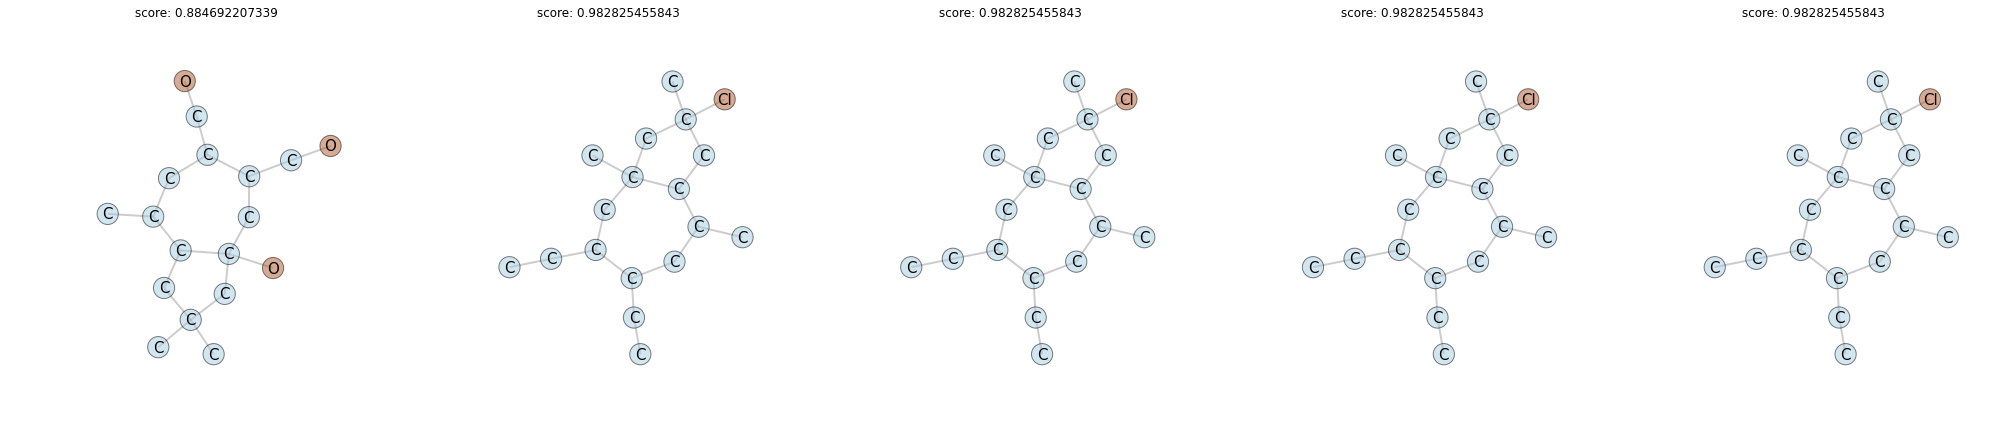

Graph id: 117


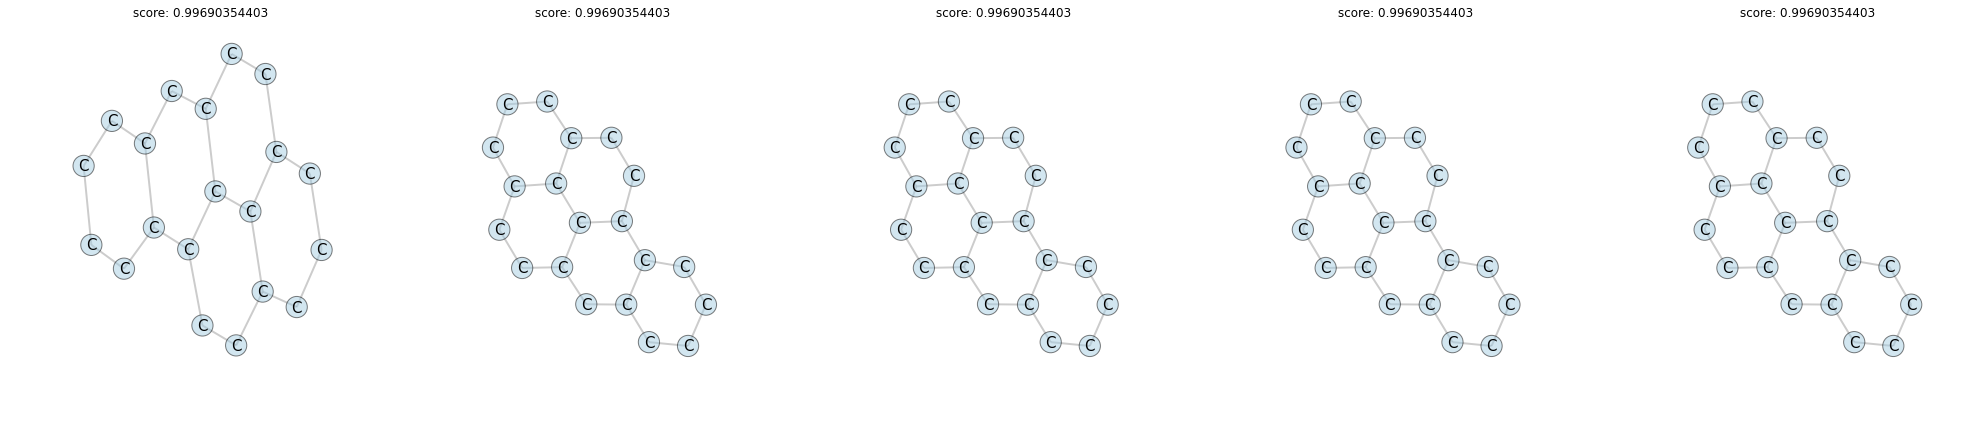

Graph id: 118


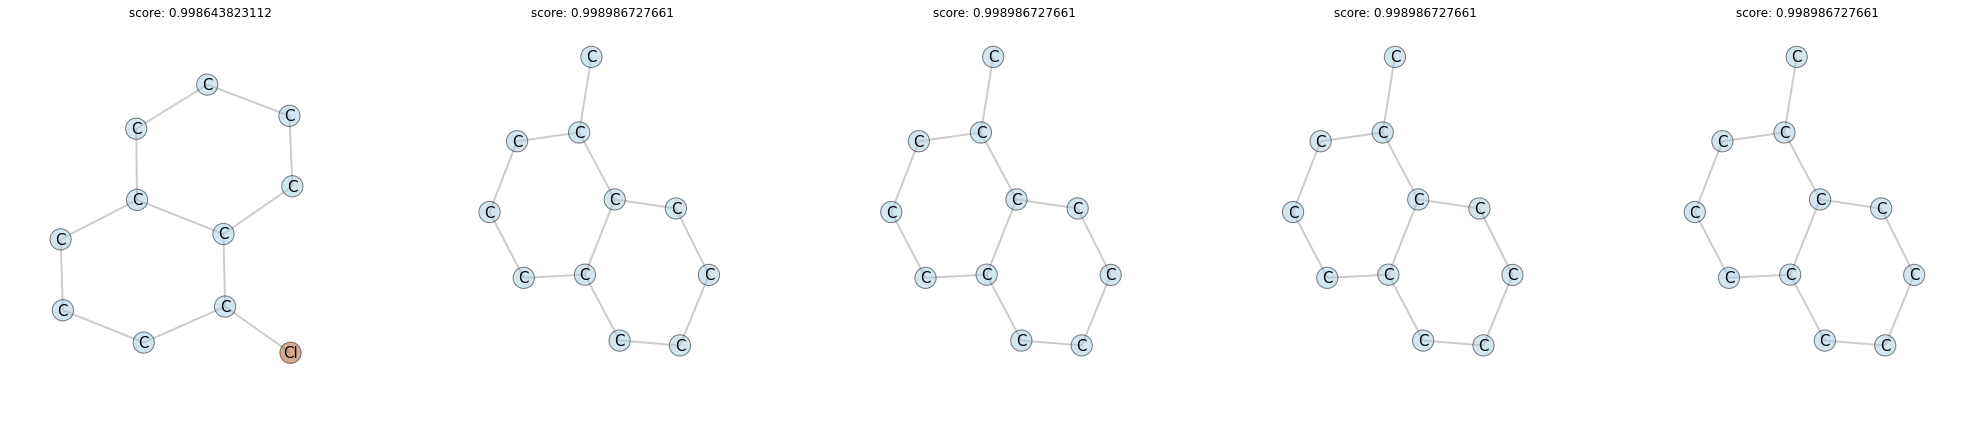

Graph id: 119


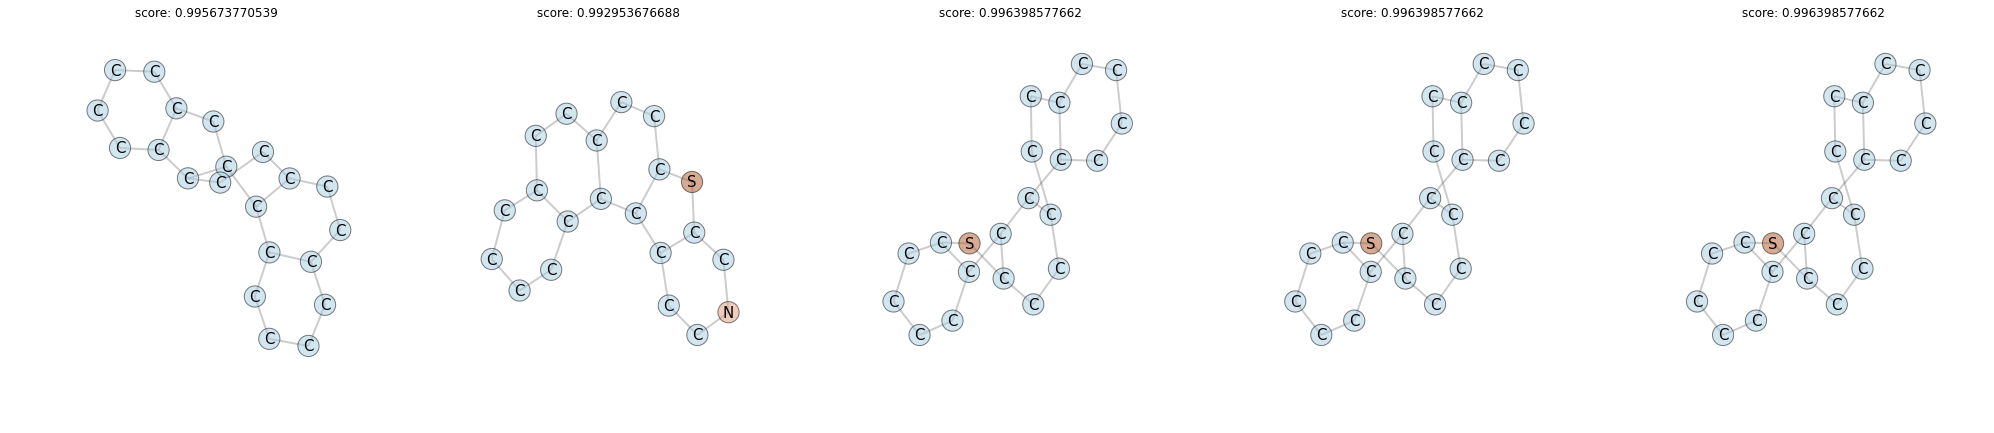

CPU times: user 1min 7s, sys: 7.62 s, total: 1min 15s
Wall time: 3min 44s


In [42]:
%%time
# plot examples of sampling paths
from graphlearn.utils.draw import  graphlearn_draw, get_score_of_graph
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    graphlearn_draw(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=get_score_of_graph)

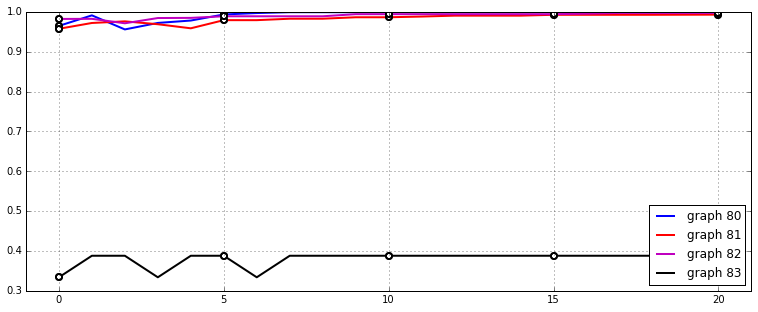

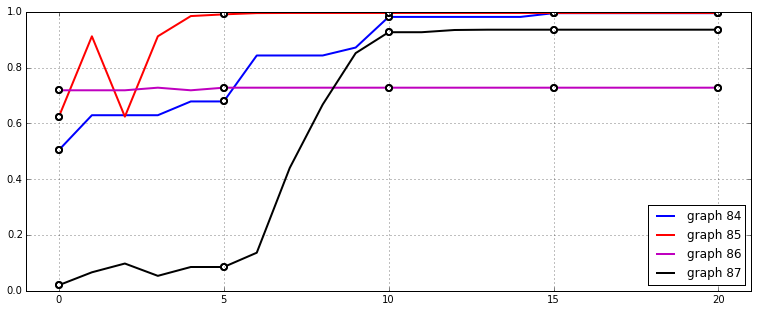

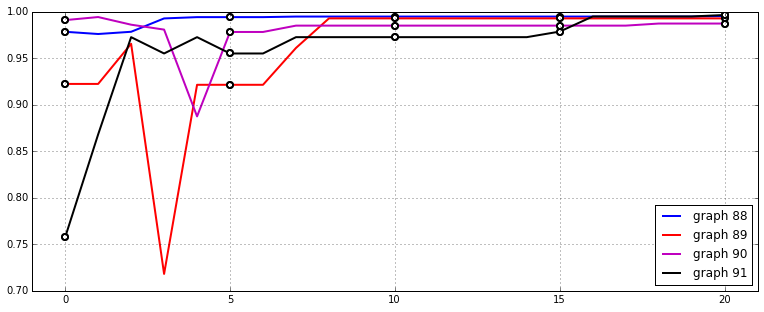

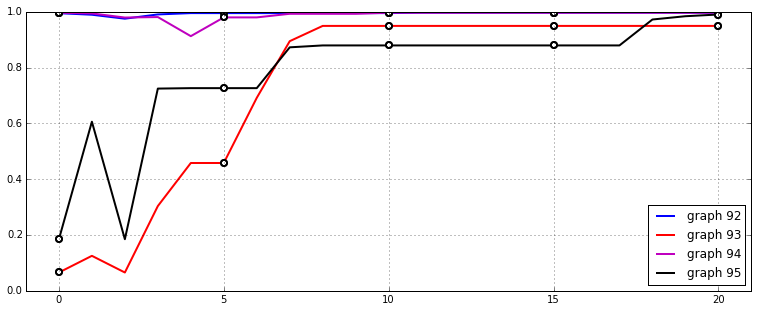

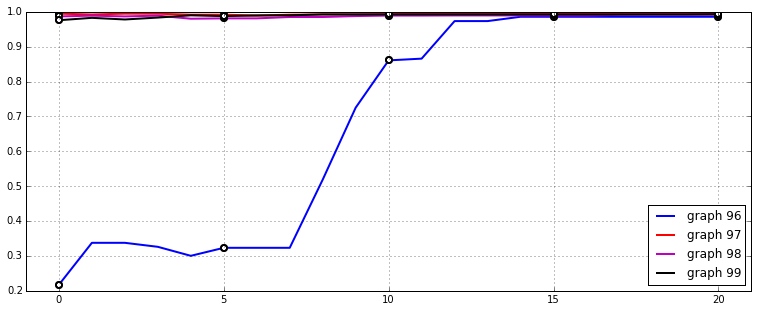

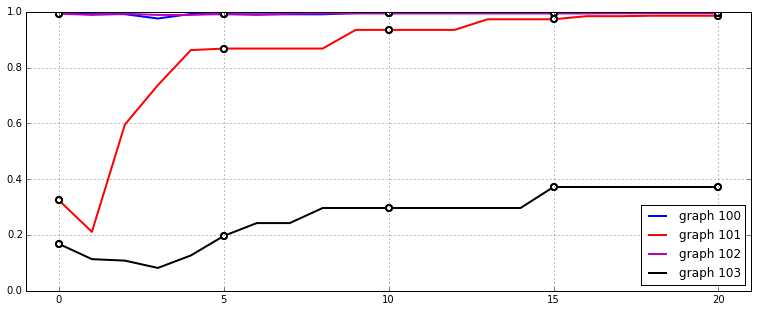

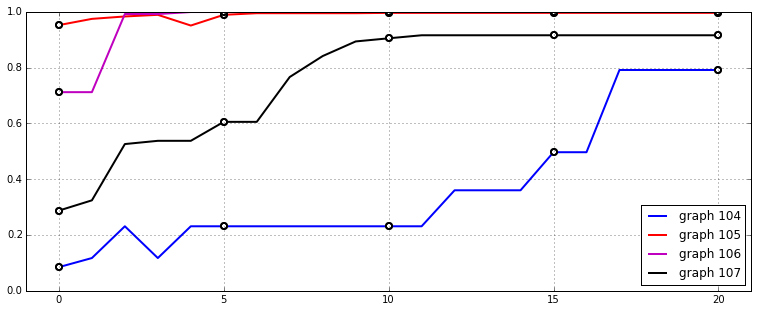

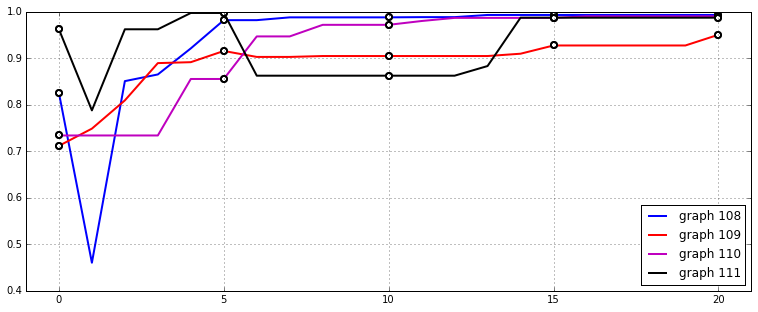

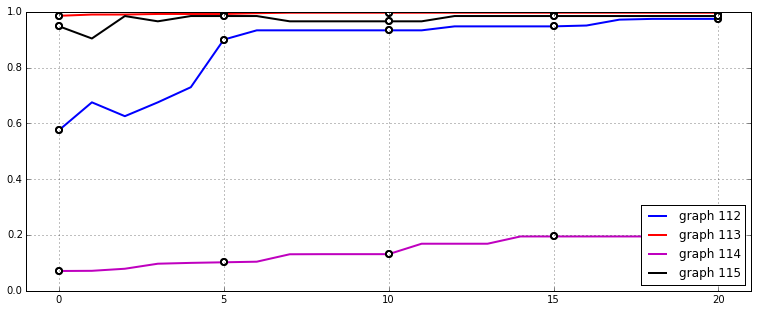

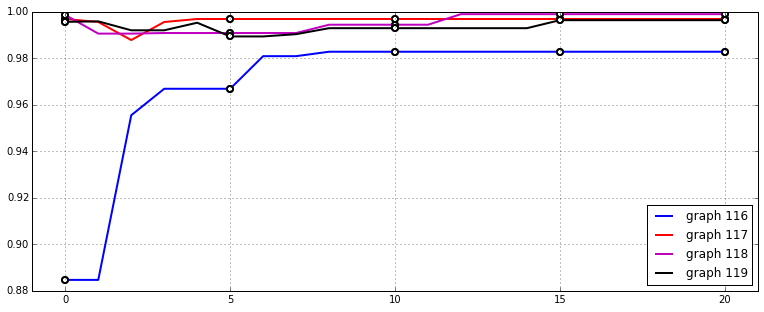

CPU times: user 2.58 s, sys: 56.7 ms, total: 2.64 s
Wall time: 2.64 s


In [43]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    #plt.ylim(-0.1,1.1)
    plt.show()

.